© Laurent Jutras-Dubé


# Nonreciprocal synchronization in embryonic oscillator ensembles

<br>

This Jupyter notebook accompanies (Ho, C., Jutras-Dubé, L. et al. (2024) "Nonreciprocal synchronization in embryonic oscillator ensembles") and reproduces most of its figures. Throughout this notebook, we explain how we visualize and analyze the data, and demonstrate how we simulate phase oscillator synchronization models. For data visualization and model simulation, this notebook relies on functions defined in the python code `functions.py`, so make sure that you have it in the same folder as this notebook.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import colors
import functions as fct

<br>

**1. Vizualize data**

We use the `get_data` function to retrieve the data that we want to visualize. This function returns two objects: a python array of time points and a list of data points. To use the `get_data` function, you need to specify the experiment's date (a string with format 'yymmdd'). You can also specify the experiment type:
- `'AB'`, the default, returns a list of three python arrays: one for each control and one for the mix;
- `'ABC'`, returns a list of four python arrays: again, one for each control and one for the mix;
- `'twin'` returns a list of two python arrays: one for each twin experiment.

Moreover, you can choose the type of output you want:
- `'raw'` returns the raw data, with all ROIs;
- `'detrended'` returns the ROI data, detrended;
- anything else (the default) will return the mean detrended data;

Finally, you can specify further the output type via the Boolean variable `phase`:
- `False`, the default, returns the signal;
- `True` returns the phase of the signal computed via wavelet analysis with the `pyBoat` software. Note that you can only compute the phase of the detrended signals (and not of the raw data) with the `get_data` function.

To use the `get_data` function, the data must be placed in a folder called "RAFL_data", and be named according to the following convention:
"type_date_dish_t0_dt", i.e. the experiment type (AB, ABC, or twin), the date of the experiment (yymmdd), the dish (1, 2 and 3 for the controls, M for the mix), the time interval between cell mixing and the first data point, and the time interval between data points, all separated by an underscore.

**1.1 Time series**

We use the `get_data` function to retrieve an AB experiment's raw signal, then plot this data to reproduce Fig. 2C.

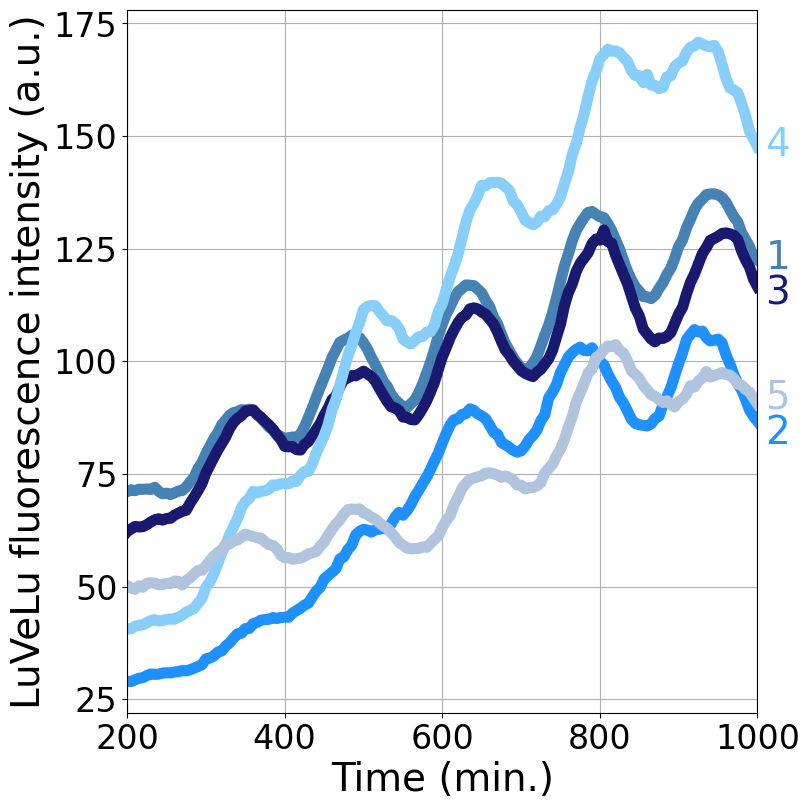

In [2]:
# Data
times, data = fct.get_data('180620', exp_type='AB', output_type='raw')

# Initialize the figure
plt.rcParams["figure.figsize"] = 8.2, 8.2
fig, ax = plt.subplots()

# Plot the time series
color = ['steelblue', 'dodgerblue', 'midnightblue', 'lightskyblue', 'lightsteelblue']
y_offsets = [200., 500.0, 400.0, 200.0, 100.0]
labels = [str(k+1) for k in range(len(color))]
for k in range(len(data[0])):
    ax.plot(times, data[0][k], c=color[k], lw=8)
    ax.text(times[-1]+10., data[0][k,-1]-y_offsets[k], labels[k], color=color[k], fontsize=28)

# Axes, ticks, grid
ax.set_xlabel('Time (min.)', fontsize=28)
ax.set_ylabel('LuVeLu fluorescence intensity (a.u.)', fontsize=28)
ax.set_xlim([200., 1000.])
ax.set_ylim([2200., 17800])
ax.set_yticks(np.arange(2500., 20000., 2500.))
ax.set_yticklabels(np.arange(25., 200., 25.).astype('int'))
ax.tick_params(labelsize=24)
ax.grid(which='major')

# Savec the figure
fig.tight_layout()
fig.savefig('Figures/FIG_2C.pdf', dpi=300)

<br>

We use the `get_data` function again to retrieve the same AB experiment's signal, but now we compute the phase of the detrended signal of each ROI. We then plot this data to reproduce Fig. 2D.

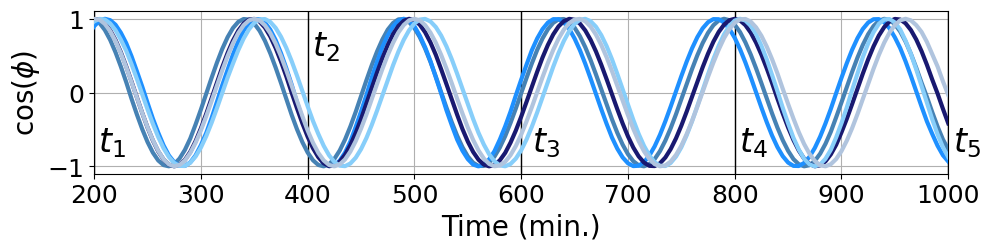

In [3]:
# Data
times, data = fct.get_data('180620', exp_type='AB', output_type='detrended', phase=True)

# Initialize the figure
plt.rcParams["figure.figsize"] = 10., 2.6
fig, ax = plt.subplots()

# Plot the time series
color = ['steelblue', 'dodgerblue', 'midnightblue', 'lightskyblue', 'lightsteelblue']
for k in range(len(data[0])):
    ax.plot(times, np.cos(data[0][k]), c=color[k], lw=3, zorder=10)

# Polar plot times
times_polar = [200., 400., 600., 800. ,1000.]
times_labels = [r'$t_1$', r'$t_2$', r'$t_3$', r'$t_4$', r'$t_5$']
times_x = [204., 404., 610., 804., 1004.]
times_y = [-0.8, 0.5, -0.8, -0.8, -0.8]
for k in range(len(times_polar)):
    ax.plot([times_polar[k], times_polar[k]], [-1.2, 1.2], c='k', lw=1, zorder=5)
    ax.text(times_x[k], times_y[k], times_labels[k], color='k', fontsize=24)

# Axes, ticks, grid
ax.set_xlabel('Time (min.)', fontsize=20)
ax.set_ylabel(r'$\cos(\phi)$', fontsize=20)
ax.set_xlim([200., 1000.])
ax.set_ylim([-1.1, 1.1])
ax.tick_params(labelsize=18)
ax.grid(which='major')

# Savec the figure
fig.tight_layout()
fig.savefig('Figures/FIG_2D.pdf', dpi=300)

<br>

We now use the `get_data` function to retrieve the mean detrended signal of two twin experiments, and plot this data to reproduce Fig. 2I.

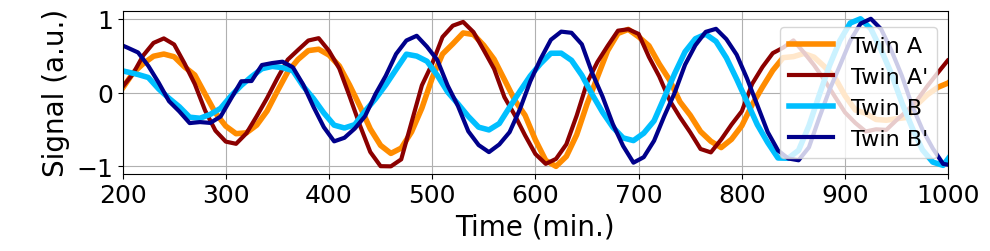

In [4]:
# Data
times1, data1 = fct.get_data('180209', exp_type='twin')
times2, data2 = fct.get_data('180329I', exp_type='twin')

# Initialize the figure
plt.rcParams["figure.figsize"] = 10., 2.6
fig, ax = plt.subplots()

# Plot the time series
ax.plot(times1, data1[0], c='darkorange', lw=4, label="Twin A")
ax.plot(times1, data1[1], c='darkred', lw=3, label="Twin A'")
ax.plot(times2, data2[0], c='deepskyblue', lw=4, label="Twin B")
ax.plot(times2, data2[1], c='darkblue', lw=3, label="Twin B'")

# Axes, ticks, grid
ax.set_xlabel('Time (min.)', fontsize=20)
ax.set_ylabel(' \nSignal (a.u.)', fontsize=20)
ax.set_xlim([200., 1000.])
ax.set_ylim([-1.1, 1.1])
ax.tick_params(labelsize=18)
ax.grid(which='major')
ax.legend(fontsize=16)

# Save the figure
fig.tight_layout()
fig.savefig('Figures/FIG_2I.pdf', dpi=300)

<br>

To plot times series of the AB experiments, we use the `ts_plot` function. This function takes as inputs the arrays of time points and data points returned by the `get_data` function, as well as a file name. You can specify if you want to include the legend or not, and where to place the black line that indicates the time point of the accompanying polar plot (see Fig. 3). You can also specify if you are plotting simulation results or not; this simply replaces the default y axis label "Signal (a.u.)" by "$\cos(\phi)$". 

Below, we use the `ts_plot` function to reproduce Fig. 3B.

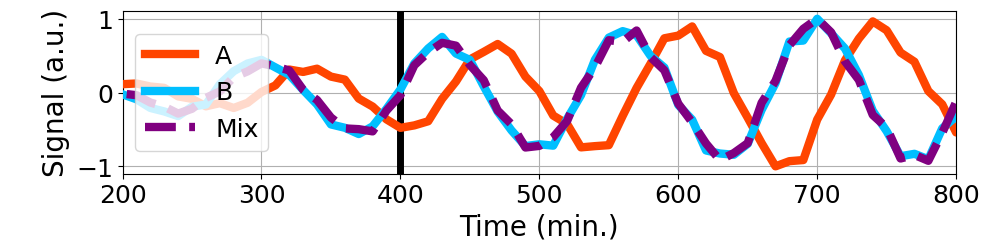

In [5]:
# Data
times, data = fct.get_data('170815', exp_type='AB')

# Polar plot
fct.ts_plot(times, data, 'FIG_3B_ts')

<br>

**1.2 Polar plots**

Below, we use the `get_data` function to retrieve the phase of each ROI's detrended signal for one AB experiment, then plot this data to reproduce Fig. 2F.

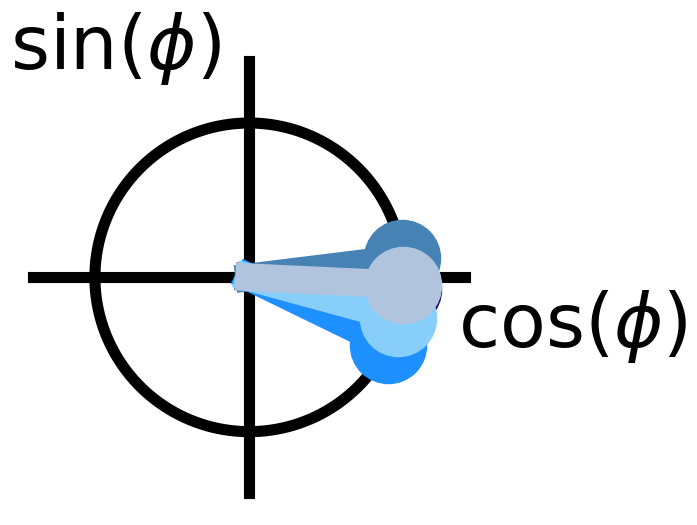

In [6]:
# Data
times, data = fct.get_data('180620', exp_type='AB', output_type='detrended', phase=True)

# Figure size
plt.rcParams["figure.figsize"] = 7., 7.
fig, ax = plt.subplots()

# Time point for the polar plot
t = 200.
t_index = np.where(times == t)[0][0]

# Axes
ax.plot([-1.4,1.4], [0.,0.], c='k', lw=8, zorder=0)
ax.plot([0.,0.], [-1.4,1.4], c='k', lw=8, zorder=0)

# Axes' labels
ax.text(-1.55, 1.35, '$\sin(\phi)$', color='k', fontsize=54)
ax.text(1.35, -0.45, '$\cos(\phi)$', color='k', fontsize=54)

# Circle
x = np.linspace(-1.,1.,1000)
ax.plot(x, np.sqrt(1-x**2), c='k', lw=8, zorder=0)
ax.plot(x, -np.sqrt(1-x**2), c='k', lw=8, zorder=0)

# Polar plot
color = ['steelblue', 'dodgerblue', 'midnightblue', 'lightskyblue', 'lightsteelblue']
for k in range(len(data[0])):
    ax.scatter(np.cos(data[0][k,t_index]), np.sin(data[0][k,t_index]), c=color[k], s=3000, zorder=2*k+1)
    ax.plot([0., np.cos(data[0][k,t_index])], [0., np.sin(data[0][k,t_index])], c=color[k], lw=20, zorder=2*k+2)

# Aspect
ax.set_aspect('equal')
ax.axis('off')

# Save the figure
fig.tight_layout()
fig.savefig('Figures/FIG_2F.pdf', dpi=300)

<br>

To generate polar plots of the AB experiments, we use the `polar_plot` function, which takes as inputs the arrays of time points and data points returned by the `get_data` function, as well as a file name. You can also specify the time point of the polar plot; the default is 400 min.

Below, we use the `ts_plot` function to reproduce Fig. 3B.

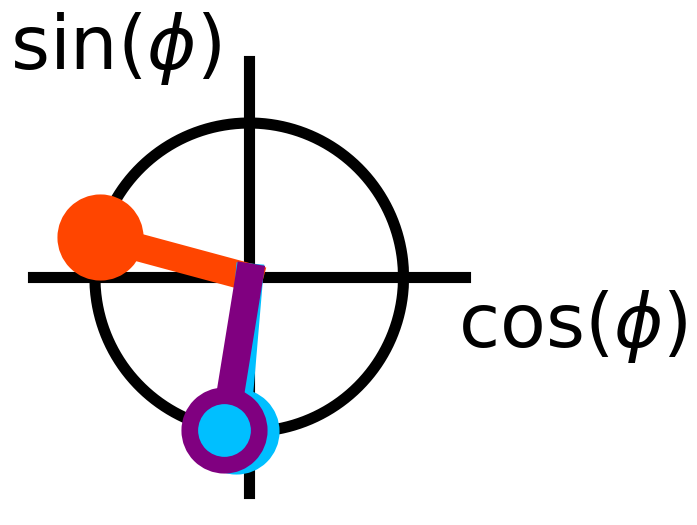

In [108]:
# Data
times, data = fct.get_data('170815', exp_type='AB', phase=True)

# Polar plot
fct.polar_plot(times, data, 'FIG_3B_polar')

<br>

We now switch things around and use the function `get_phase` to retrieve the data. This function allows you to get the phase of a specific dish, whatever the experiment type (AB, ABC, twin, even some "orphan" experiments for which only one of the two controls survived). The `get_phase` function takes one input, the experiment's file name, and you can specify whether you want the phase of all detrended ROIs or the mean detrended phase, which is the default.

Below, we use the `get_phase` function to reproduce Fig. 2J. For this figure, we retrieve the mean detrended phase of all time series (for this, the `get_file_names` function comes in handy), except for the mixes and the second twin experiments, which are not independent measurements of the phase. To exclude those experiments, we use the `get_exp_info` function, which returns all info contained in the file names: the experiment type (AB, ABC, AA for twin experiments and O for orphan experiments), the date of the experiment (yymmdd), the dish (1, 2 or 3 for the controls, M for the mix), the time interval between cell mixing and the first data point, and the time interval between data points.

In [8]:
# Time
t = 280.
phases = []

# Iterate over all experiments
file_names = fct.get_file_names()
exp_type, exp_date, exp_dish, exp_dt, exp_t0 = fct.get_exp_info()
for k in range(len(file_names)):
    
    # Exclude the mixes
    if exp_dish[k] == 'M':
        continue
    
    # Exclude twin experiments' second dish
    elif (exp_type[k] == 'AB') and (exp_dish[k] == '2'):
        continue

    # Mean detrended phase
    times, phase = fct.get_phase(file_names[k])
        
    # Adjust some experiments' time
    dt = 0.
    if (exp_dt[k] == 10.) and not(exp_t0[k] % 10. == 0.):
        dt = 5.
    
    # Retrieve time index
    t_i = np.where(times == t+dt)[0]
    if (len(t_i) != 0):
        phases.append(phase[t_i[0]])

phases = np.array(phases)

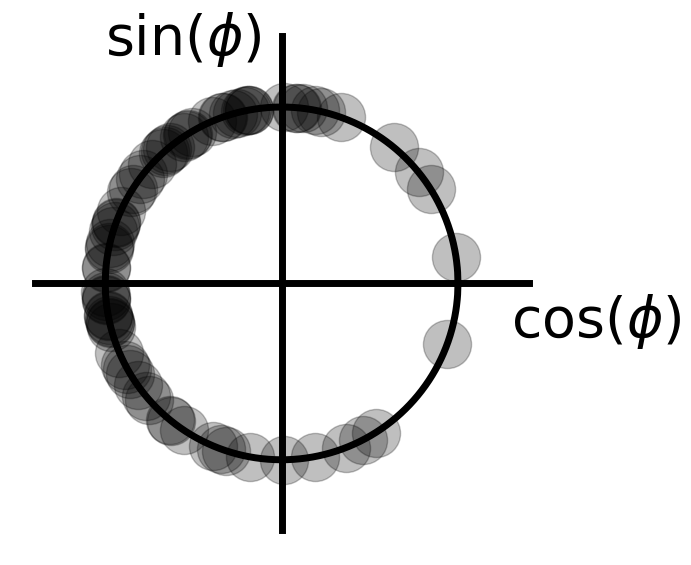

In [9]:
# Figure size
plt.rcParams["figure.figsize"] = 7., 7.
fig, ax = plt.subplots()

# Axes
ax.plot([-1.4,1.4], [0.,0.], c='k', lw=5, zorder=0)
ax.plot([0.,0.], [-1.4,1.4], c='k', lw=5, zorder=0)
ax.text(-1, 1.3, '$\sin(\phi)$', fontsize=40)
ax.text(1.3, -0.3, '$\cos(\phi)$', fontsize=40)

# Circle
x = np.linspace(-1.,1.,1000)
ax.plot(x, np.sqrt(1-x**2), c='k', lw=5, zorder=0)
ax.plot(x, -np.sqrt(1-x**2), c='k', lw=5, zorder=0)

# Phases
ax.scatter(np.cos(phases), np.sin(phases), c='k', s=1200, alpha=0.25, zorder=1)

# Aspect, axis
ax.set_aspect('equal')
ax.axis('off')

# Save the figure
fig.tight_layout()
fig.savefig('Figures/FIG_2J.pdf', dpi=300)

<br>

We now use the function `get_period` to retrieve the instantaneous period of the A and B controls in each AB experiment as computed by the `pyBoat` software. Then, we compute the period difference between each pair of controls and plot the period difference's cumulative distribution. We also compare this distribution to the distribution of period differences between the anterior PSM and the posterior PSM of the tail experiments described in Fig. S3. 

In [10]:
# Time
t = 400.
periods = []
dates = []

# Iterate over all experiments
file_names = fct.get_file_names()
exp_type, exp_date, exp_dish, exp_dt, exp_t0 = fct.get_exp_info()
for k in range(len(file_names)):
    
    # Exclude the mixes
    if exp_dish[k] == 'M':
        continue
    
    # Keep only AB experiments
    if (exp_type[k] == 'AB'):

        # Keep track of the experiment date
        dates.append(exp_date[k])

        # Period
        times, period = fct.get_period(file_names[k])
            
        # Adjust some experiments' time
        dt = 0.
        if (exp_dt[k] == 10.) and not(exp_t0[k] % 10. == 0.):
            dt = 5.
        
        # Retrieve time index
        t_i = np.where(times == t+dt)[0]
        if (len(t_i) != 0):
            periods.append(period[t_i[0]])

periods = np.array(periods)
dates = np.array(dates)
unique_dates = np.unique(dates)

# Compute the period differences
period_diff_RAFL = []
for date in unique_dates:
    indices = np.where(dates == date)[0]
    period_diff_RAFL.append(np.abs(periods[indices[0]]-periods[indices[1]]))
period_diff_RAFL = np.array(period_diff_RAFL)

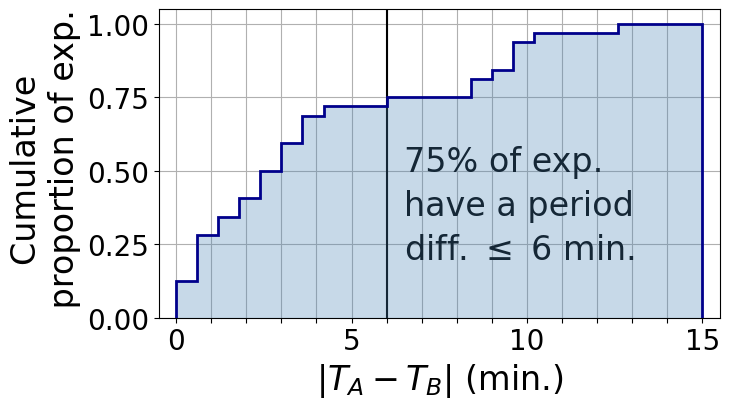

In [11]:
# Figure size
plt.rcParams["figure.figsize"] = 7.4, 4.2
fig, ax = plt.subplots()
nbins = 25

# Cumulative histogram
ax.hist(period_diff_RAFL, bins=nbins, histtype='bar', range=(0., 15.), alpha=0.3, color='steelblue', cumulative=True, density=True, zorder=10)
ax.hist(period_diff_RAFL, bins=nbins, histtype='step', range=(0., 15.), lw=2, color='darkblue', cumulative=True, density=True, zorder=10)

# Axes, ticks, grid, legend
ax.set_xlabel(r'$|T_A-T_B|$ (min.)', fontsize=24)
ax.set_ylabel('Cumulative \n proportion of exp.', fontsize=24)
ax.set_xlim([-0.5, 15.5])
ax.set_xticks(np.linspace(0,15,16))
ax.set_xticklabels(['0', '', '', '', '', '5', '', '', '', '', '10', '', '', '', '', '15'])
ax.set_ylim([0., 1.05])
ax.set_yticks([0., 0.25, 0.5, 0.75, 1.])
ax.tick_params(labelsize=20)
ax.grid(which='both')
ax.axvline(x=6., c='k', zorder=2)

# Superimposed text
ax.text(6.5, 0.5, '75% of exp.', fontsize=24)
ax.text(6.5, 0.35, 'have a period', fontsize=24)
ax.text(6.5, 0.2, r'diff. $\leq$ 6 min.', fontsize=24)

# Save the figure
fig.tight_layout()
fig.savefig('Figures/FIG_S6A.pdf', dpi=300)

In [12]:
from pyboat import WAnalyzer

def get_tail_periods(file_name, roi=False):
    
    # Raw signal
    data = np.genfromtxt(file_name, delimiter='	').T
    if (len(data) == len(data.T)):    data = np.expand_dims(data,axis=0)

    # Time points
    dt = float(file_name.split('/')[2].split('.')[0].split('_')[3])
    t0 = float(file_name.split('/')[2].split('.')[0].split('_')[4])
    times = np.arange(t0, t0+dt*len(data[0]), dt)
    
    # Detrended signal
    p_max = 200.
    periods = np.linspace(100., 180., 150)

    for j in range(len(data)):

        wAn = WAnalyzer(periods=periods,dt=dt,p_max=p_max)
        trend = wAn.sinc_smooth(data[j],T_c=p_max)
        data[j] = (data[j]-trend)
        data[j] = data[j]/np.max(np.abs(data[j]))

        wAn.compute_spectrum(data[j], do_plot=False)
        wAn.get_maxRidge()
        data[j] = np.array(wAn.ridge_data['periods'])
 
    return times, data

In [13]:
# Time
t = 112.
period_diff_tail = []
dates = []

# Iterate over all experiments
file_names = fct.get_tail_file_names()
exp_type, exp_date, exp_dish, exp_dt, exp_t0 = fct.get_exp_info()
for k in range(len(file_names)):
    
    times, periods = get_tail_periods(file_names[k])
            
    # Retrieve time index
    t_i = np.where(times == t)[0]

    # Compute the phase difference
    period_diff_tail.append(np.abs(periods[0,t_i]-periods[2,t_i])[0])

period_diff_tail = np.array(period_diff_tail)

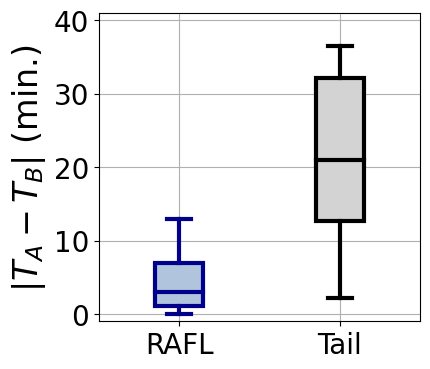

In [14]:
# Figure size
plt.rcParams["figure.figsize"] = 4.4, 3.8
fig, ax = plt.subplots()

# Box plot
bplot = ax.boxplot([period_diff_RAFL, period_diff_tail], labels=['RAFL', 'Tail'], patch_artist=True, widths=0.3)

bplot['boxes'][0].set_color('darkblue')
bplot['boxes'][1].set_color('k')
bplot['boxes'][0].set_facecolor('lightsteelblue')
bplot['boxes'][1].set_facecolor('lightgrey')
bplot['boxes'][0].set_linewidth(3)
bplot['boxes'][1].set_linewidth(3)
bplot['medians'][0].set_color('darkblue')
bplot['medians'][1].set_color('k')
bplot['medians'][0].set_linewidth(3)
bplot['medians'][1].set_linewidth(3)
bplot['whiskers'][0].set_linewidth(3)
bplot['whiskers'][1].set_linewidth(3)
bplot['whiskers'][2].set_linewidth(3)
bplot['whiskers'][3].set_linewidth(3)
bplot['whiskers'][0].set_color('darkblue')
bplot['whiskers'][1].set_color('darkblue')
bplot['caps'][0].set_linewidth(3)
bplot['caps'][1].set_linewidth(3)
bplot['caps'][2].set_linewidth(3)
bplot['caps'][3].set_linewidth(3)
bplot['caps'][0].set_color('darkblue')
bplot['caps'][1].set_color('darkblue')

# Axes, ticks, grid, legend
ax.set_ylabel(r'$|T_A-T_B|$ (min.)', fontsize=24)
ax.set_ylim([-1., 41.])
# ax.set_yticks([0., 0.25, 0.5, 0.75, 1.])
ax.tick_params(labelsize=20)
ax.grid(which='both')

# Save the figure
fig.tight_layout()
fig.savefig('Figures/FIG_S6B.pdf', dpi=300)

<br>

**2. Quantify synchronization**

In this section, we quantify the ROI synchronization level by computing:
- the Kuramoto order parameter, ranging from 1 (perfect synchronization) to 0 (no synchronization); 
- the standard deviation of the phase, ranging from 0 (perfect synchronization) to $\pi$ (no synchronization). 

<!-- 
$|\sum_{k=1}^n e^{i\phi_k}|$
$\frac{1}{n}\sqrt{-2 \: \ln{\sqrt{\bigg(\sum_{k=1}^n \cos(\phi_k)\bigg)^2+\bigg(\sum_{k=1}^n \sin(\phi_k)\bigg)^2}}}$
https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Circular_Data_Analysis.pdf
-->

**2.1 Kuramoto order parameter**

Below, we reproduce Fig. 2, G and H, by computing and plotting the distribution of Kuramoto order parameters across all experiments that have more than one ROI.

In [15]:
# Get experiments' info
file_names = fct.get_file_names()
exp_type, exp_date, exp_dish, exp_dt, exp_t0 = fct.get_exp_info()

# Times for plotting the kuramoto order parameter (kop)
times_plot = np.arange(200., 1010., 10.)
kop_exp = [[] for j in times_plot]
kop_random = []

# Iterate over all experiments
for k in range(len(file_names)):

    # ROI phases
    times, phase = fct.get_phase(file_names[k], roi=True)
    
    # Exclude experiments with only one ROI
    if len(phase) <= 1:    continue
        
    # Kuramoto order parameter: experiments
    temp = np.abs(np.sum(np.exp(phase*1j), axis=0)/len(phase))
    
    # Random phases
    random_phase = np.random.uniform(low=-np.pi, high=np.pi, size=len(phase))
    
    # Kuramoto order parameter: random phases
    kop_random.append(np.abs(np.sum(np.exp(random_phase*1j))/len(phase)))
    
    # Adjust some experiments' time
    dt = 0.
    if (exp_dt[k] == 10.) and not(exp_t0[k] % 10. == 0.):
        dt = 5.
    
    # Iterate over time points
    for j in range(len(times_plot)):
        t_i = np.where(times == times_plot[j]+dt)[0]
        if len(t_i) != 0:
            kop_exp[j].append(temp[t_i[0]])
            
# Compute the mean and standard deviation: experiments
kop_mean, kop_std = np.zeros(len(times_plot)), np.zeros(len(times_plot))
for j in range(len(times_plot)):
    kop_exp[j] = np.array(kop_exp[j])
    kop_mean[j], kop_std[j] = kop_exp[j].mean(), kop_exp[j].std()
    

# Compute the mean and standard deviation: random phases
kop_random = np.array(kop_random)
kop_random_mean = kop_random.mean()
kop_random_std = kop_random.std()

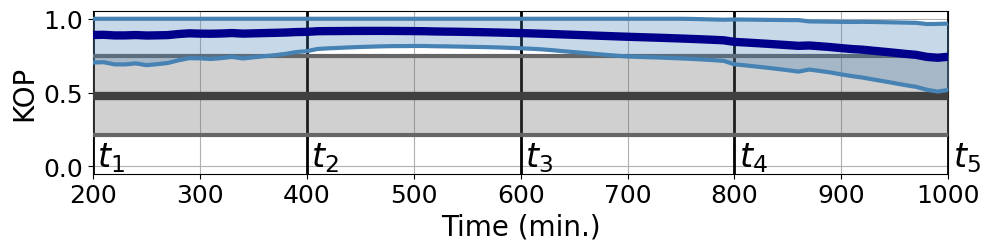

In [16]:
# Figure size
plt.rcParams["figure.figsize"] = 10., 2.6
fig, ax = plt.subplots()

# Experiments
ax.plot(times_plot, kop_mean, c='darkblue', lw=6, zorder=11)
kop_top = np.minimum(kop_mean+kop_std, np.ones(len(times_plot)))
kop_bottom = kop_mean-kop_std
ax.plot(times_plot, kop_top, c='steelblue', lw=3, zorder=10)
ax.plot(times_plot, kop_bottom, c='steelblue', lw=3, zorder=10)
ax.fill_between(times_plot, kop_bottom, kop_top, color='steelblue', alpha=0.3, zorder=10)

# Random phases
ax.plot([200., 1000.], [kop_random_mean, kop_random_mean], c='0.25', lw=6, zorder=9)
kop_random_top = kop_random_mean+kop_random_std
kop_random_bottom = kop_random_mean-kop_random_std
ax.plot([200., 1000.], [kop_random_top, kop_random_top], c='0.4', lw=3, zorder=8)
ax.plot([200., 1000.], [kop_random_bottom, kop_random_bottom], c='0.4', lw=3, zorder=8)
ax.fill_between([200., 1000.], [kop_random_bottom, kop_random_bottom], [kop_random_top, kop_random_top], color='0.4', alpha=0.3, zorder=8)

# Polar plot times
times_violin = [200., 400., 600., 800. ,1000.]
times_labels = [r'$t_1$', r'$t_2$', r'$t_3$', r'$t_4$', r'$t_5$']
for k in range(len(times_violin)):
    ax.plot([times_violin[k], times_violin[k]], [-1.2, 1.2], c='k', lw=2, zorder=5)
    ax.text(times_violin[k]+4., 0., times_labels[k], color='k', fontsize=24)

# Axes, ticks, grid
ax.set_xlabel('Time (min.)', fontsize=20)
ax.set_ylabel('KOP', fontsize=20)
ax.set_xlim([200., 1000.])
ax.set_ylim([-0.05, 1.05])
ax.tick_params(labelsize=18)
ax.grid(which='major')

# Save the figure
fig.tight_layout()
fig.savefig('Figures/FIG_2G.pdf', dpi=300)

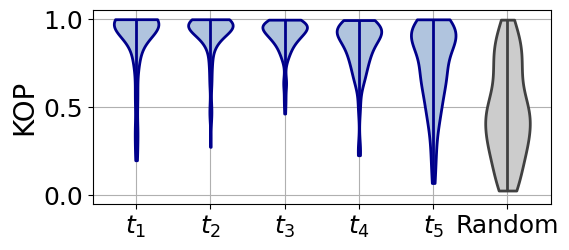

In [17]:
# Figure size
plt.rcParams["figure.figsize"] = 5.8, 2.6
fig, ax = plt.subplots()

# Time points
t_i = np.array([np.where(times_plot == t)[0][0] for t in times_violin])

# Experiments
exp = ax.violinplot([kop_exp[t_i[k]] for k in range(len(t_i))], widths=0.6)

for body in exp['bodies']:
    body.set_facecolor('lightsteelblue')
    body.set_edgecolor('darkblue')
    body.set_alpha(1)
    body.set_linewidth(2)

exp['cbars'].set_linewidth(2)
exp['cbars'].set_color('darkblue')
exp['cmins'].set_alpha(0)
exp['cmaxes'].set_alpha(0)

# Random phases
random_phases = ax.violinplot(kop_random, positions=[6], widths=0.6)

random_phases['bodies'][0].set_facecolor('0.8')
random_phases['bodies'][0].set_edgecolor('0.25')
random_phases['bodies'][0].set_alpha(1)
random_phases['bodies'][0].set_linewidth(2)
random_phases['cbars'].set_linewidth(2)
random_phases['cbars'].set_color('0.25')
random_phases['cmins'].set_alpha(0)
random_phases['cmaxes'].set_alpha(0)

# Axes, ticks, grid
ax.set_ylabel('KOP', fontsize=20)
ax.tick_params(labelsize=18)
ax.set_ylim([-0.05, 1.05])
ax.set_xticks([1, 2, 3, 4, 5, 6])
ax.set_xticklabels([r'$t_1$', r'$t_2$', r'$t_3$', r'$t_4$', r'$t_5$', 'Random'])
ax.grid(which='major')
ax.set_axisbelow(True)

# Save the figure 
fig.tight_layout()
fig.savefig('Figures/FIG_2H.pdf', dpi=300)

<br>

**2.2 Standard deviation of the phase**

Below, we reproduce Fig. S1, A to C, by following a similar procedure as above.

In [18]:
# Get experiments' info
file_names = fct.get_file_names()
exp_type, exp_date, exp_dish, exp_dt, exp_t0 = fct.get_exp_info()

# Times for plotting the standard deviation of the phase (circstd)
times_plot = np.arange(200., 1010., 10.)
circstd_exp = [[] for j in times_plot]
circstd_random = []

# Iterate over all experiments
for k in range(len(file_names)):

    # ROI phases
    times, phase = fct.get_phase(file_names[k], roi=True)
    
    # Exclude experiments with only one ROI
    if len(phase) <= 1:    continue
        
    # Standard deviation of the phase: experiments
    temp = sp.stats.circstd(phase, axis=0)
    
    # Random phases
    random_phase = np.random.uniform(low=-np.pi, high=np.pi, size=len(phase))
    
    # Standard deviation of the phase: random phases
    circstd_random.append(sp.stats.circstd(random_phase, axis=0))
    
    # Adjust some experiments' time
    dt = 0.
    if (exp_dt[k] == 10.) and not(exp_t0[k] % 10. == 0.):
        dt = 5.
    
    # Iterate over time points
    for j in range(len(times_plot)):
        t_i = np.where(times == times_plot[j]+dt)[0]
        if len(t_i) != 0:
            circstd_exp[j].append(temp[t_i[0]])
            
# Compute the mean: experiments
circstd_mean, circstd_std = np.zeros(len(times_plot)), np.zeros(len(times_plot))
for j in range(len(times_plot)):
    circstd_exp[j] = np.array(circstd_exp[j])
    circstd_mean[j], circstd_std[j] = circstd_exp[j].mean(), circstd_exp[j].std()
    

# Compute the mean: random phases
circstd_random = np.array(circstd_random)
circstd_random_mean = circstd_random.mean()
circstd_random_std = circstd_random.std()

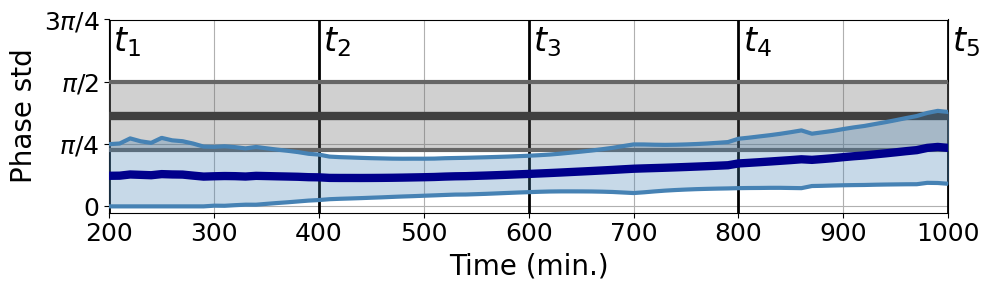

In [19]:
# Figure size
plt.rcParams["figure.figsize"] = 10., 3.
fig, ax = plt.subplots()

# Experiments
ax.plot(times_plot, circstd_mean, c='darkblue', lw=6, zorder=11)
circstd_top = circstd_mean+circstd_std
circstd_bottom = np.maximum(circstd_mean-circstd_std, np.zeros(len(times_plot)))
ax.plot(times_plot, circstd_top, c='steelblue', lw=3, zorder=10)
ax.plot(times_plot, circstd_bottom, c='steelblue', lw=3, zorder=10)
ax.fill_between(times_plot, circstd_bottom, circstd_top, color='steelblue', alpha=0.3, zorder=10)

# Random phases
ax.plot([200., 1000.], [circstd_random_mean, circstd_random_mean], c='0.25', lw=6, zorder=9)
circstd_random_top = circstd_random_mean+circstd_random_std
circstd_random_bottom = circstd_random_mean-circstd_random_std
ax.plot([200., 1000.], [circstd_random_top, circstd_random_top], c='0.4', lw=3, zorder=8)
ax.plot([200., 1000.], [circstd_random_bottom, circstd_random_bottom], c='0.4', lw=3, zorder=8)
ax.fill_between([200., 1000.], [circstd_random_bottom, circstd_random_bottom], [circstd_random_top, circstd_random_top], color='0.4', alpha=0.3, zorder=8)

# Polar plot times
times_violin = [200., 400., 600., 800. ,1000.]
times_labels = [r'$t_1$', r'$t_2$', r'$t_3$', r'$t_4$', r'$t_5$']
for k in range(len(times_violin)):
    ax.plot([times_violin[k], times_violin[k]], [-1.2, 3.2], c='k', lw=2, zorder=5)
    ax.text(times_violin[k]+4., 1.95, times_labels[k], color='k', fontsize=24)

# Axes, ticks, grid
ax.set_xlabel('Time (min.)', fontsize=20)
ax.set_ylabel('Phase std', fontsize=20)
ax.set_xlim([200., 1000.])
ax.set_ylim([-0.08, 3.*np.pi/4.])
ax.set_yticks([0., np.pi/4., np.pi/2., 3.*np.pi/4.])
ax.set_yticklabels([r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$"])
ax.tick_params(labelsize=18)
ax.grid(which='major')

# Save the figure
fig.tight_layout()
fig.savefig('Figures/FIG_S1A.pdf', dpi=300)

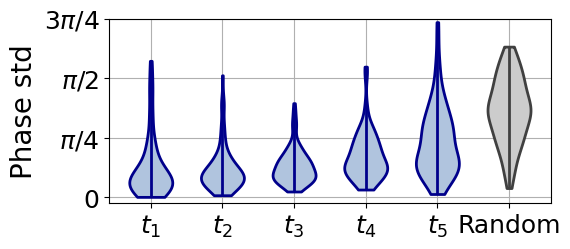

In [20]:
# Figure size
plt.rcParams["figure.figsize"] = 5.8, 2.6
fig, ax = plt.subplots()

# Time points
t_i = np.array([np.where(times_plot == t)[0][0] for t in times_violin])

# Experiments
exp = ax.violinplot([circstd_exp[t_i[k]] for k in range(len(t_i))], widths=0.6)

for body in exp['bodies']:
    body.set_facecolor('lightsteelblue')
    body.set_edgecolor('darkblue')
    body.set_alpha(1)
    body.set_linewidth(2)

exp['cbars'].set_linewidth(2)
exp['cbars'].set_color('darkblue')
exp['cmins'].set_alpha(0)
exp['cmaxes'].set_alpha(0)

# Random phases
random_phases = ax.violinplot(circstd_random, positions=[6], widths=0.6)

random_phases['bodies'][0].set_facecolor('0.8')
random_phases['bodies'][0].set_edgecolor('0.25')
random_phases['bodies'][0].set_alpha(1)
random_phases['bodies'][0].set_linewidth(2)
random_phases['cbars'].set_linewidth(2)
random_phases['cbars'].set_color('0.25')
random_phases['cmins'].set_alpha(0)
random_phases['cmaxes'].set_alpha(0)

# Axes, ticks, grid
ax.set_ylabel('Phase std', fontsize=20)
ax.tick_params(labelsize=18)
ax.set_ylim([-0.08, 3.*np.pi/4.])
ax.set_yticks([0., np.pi/4., np.pi/2., 3.*np.pi/4.])
ax.set_yticklabels([r"$0$", r"$\pi/4$", r"$\pi/2$", r"$3\pi/4$"])
ax.set_xticks([1, 2, 3, 4, 5, 6])
ax.set_xticklabels([r'$t_1$', r'$t_2$', r'$t_3$', r'$t_4$', r'$t_5$', 'Random'])
ax.grid(which='major')
ax.set_axisbelow(True)

# Save the figure
fig.tight_layout()
fig.savefig('Figures/FIG_S1B.pdf', dpi=300)

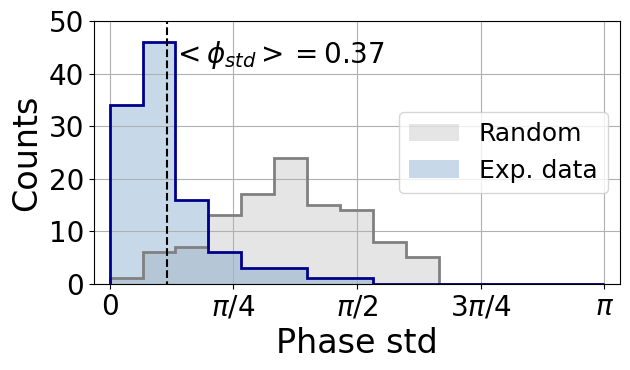

In [21]:
# Figure size
plt.rcParams["figure.figsize"] = 6.4, 3.8
fig, ax = plt.subplots()
nbins = 15

# Time point
t = 400.
t_i = np.where(times_plot == t)[0][0]

# Random phases
ax.hist(circstd_random, bins=nbins, histtype='bar', range=(0., np.pi), alpha=0.2, color='grey', label='Random')
ax.hist(circstd_random, bins=nbins, histtype='step', range=(0., np.pi), lw=2, color='grey')

# Experiments
ax.hist(circstd_exp[t_i], bins=nbins, histtype='bar', range=(0., np.pi), alpha=0.3, color='steelblue', label='Exp. data')
ax.hist(circstd_exp[t_i], bins=nbins, histtype='step', range=(0., np.pi), lw=2, color='darkblue')

# Mean (experiments)
ax.plot([circstd_mean[t_i], circstd_mean[t_i]], [-1, 50], 'k--')
ax.text(circstd_mean[t_i]+0.03, 42., '$<\phi_{std}>=$%.2f' %circstd_mean[t_i], fontsize=20)

# Axes, ticks, grid, legend
ax.set_xlabel('Phase std', fontsize=24)
ax.set_ylabel('Counts', fontsize=24)
ax.set_xlim([-0.1, np.pi+0.1])
ax.set_ylim([0., 50.])
ax.set_xticks([0., np.pi*0.25, np.pi*0.5, np.pi*0.75, np.pi])
ax.set_xticklabels(['0', '$\pi/4$', '$\pi/2$', '$3\pi/4$', '$\pi$'])
ax.set_yticks([0., 10., 20., 30., 40., 50.])
ax.tick_params(labelsize=20)
ax.grid(which='both')
ax.legend(loc=5, fontsize=18)

# Save the figure
fig.tight_layout()
fig.savefig('Figures/FIG_S1C.pdf', dpi=300)

<br>

**3. Simulate models**

In this section, we first show how to plot the coupling functions that we then use to simulate various models of phase oscillator synchronization.

**3.1 Coupling functions**

Below, we plot the coupling functions used to model oscillator synchronization. The `H_KS` and `H_RK` functions encode respectively the coupling term of the Kuramoto-Sakaguchi model (Sakaguchi & Kuramoto, 1986) and the coupling term of our rectified Kuramoto model. We can obtain the Kuramoto model with these functions by setting the $\alpha$ or $\beta$ parameters to 0. The `H_RR`function with parameter $\beta$ set to 0 encodes the coupling term of the pulsed-coupling model described in the main text. For any other parameter value, the `H_RR` function encodes our rectified pulsed-coupling model described in the SI. Finally, the `H_RK_linear` and `H_RR_linear` functions are linear versions of our rectified Kuramoto model and of our rectified pulsed-coupling model, respectively. Both linear models are described in the SI.

To use these coupling functions, we need to build a parameter dictionary that contains parameters such as $\alpha$ and $\beta$. This dictionary also contains parameters that will become useful later when we integrate the synchronization models: the coupling strength $c$, the total integration time, the oscillator frequency, the initial phases, etc.

Below, we build such a parameter dictionary and plot the Kuramoto-Sakaguchi coupling function (Fig. 5A), our rectified Kuramoto coupling function (Fig. 5E), and the pulsed-coupling model's coupling function (Fig. 5C).

In [22]:
# Parameter dictionary
param = {
    
    # Integration
    "total_t"   : 805.,
    "dt"        : 0.1,
    "n_skr"     : 50,
    "noise_std" : 0.,
    
    # Initial conditions
    "init_phi_A" : 0.,
    "init_phi_B" : np.pi*0.5,
    
    # Frequencies
    "omega_A" : 0.0457,
    "omega_B" : 0.0457,

    # Coupling
    "c"       : 0.015,
    "phi*"    : 0.,
    "s_sigma" : 0.1,
    "alpha"   : 0.,
    "beta"    : 0.,
    "gamma"   : 0.
    
}

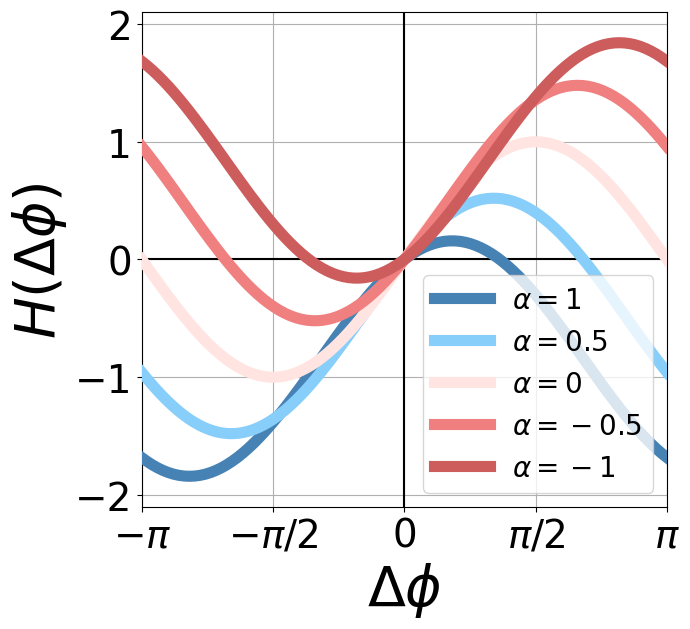

In [23]:
# Figure size
plt.rcParams["figure.figsize"] = 7., 6.4
fig, ax = plt.subplots()

# Phases
n_phases = 100
phase_array = np.linspace(-np.pi, np.pi, n_phases)

# Kuramoto-Sakaguchi coupling 1
param["alpha"] = 1.
ax.plot(phase_array, [fct.H_KS(0., phase_array[k], param) for k in range(n_phases)], c='steelblue', lw=8, zorder=3, label=r'$\alpha=1$')

# Kuramoto-Sakaguchi coupling 2
param["alpha"] = 0.5
ax.plot(phase_array, [fct.H_KS(0., phase_array[k], param) for k in range(n_phases)], c='lightskyblue', lw=8, zorder=3, label=r'$\alpha=0.5$')

# Kuramoto-Sakaguchi coupling 3 (Kuramoto)
param["alpha"] = 0.
ax.plot(phase_array, [fct.H_KS(0., phase_array[k], param) for k in range(n_phases)], c='mistyrose', lw=8, zorder=3, label=r'$\alpha=0$')

# Kuramoto-Sakaguchi coupling 4
param["alpha"] = -0.5
ax.plot(phase_array, [fct.H_KS(0., phase_array[k], param) for k in range(n_phases)], c='lightcoral', lw=8, zorder=3, label=r'$\alpha=-0.5$')

# Kuramoto-Sakaguchi coupling 5
param["alpha"] = -1.
ax.plot(phase_array, [fct.H_KS(0., phase_array[k], param) for k in range(n_phases)], c='indianred', lw=8, zorder=3, label=r'$\alpha=-1$')

# Axes, ticks, grid, legend
ax.set_ylabel('$H(\Delta \phi)$', fontsize=40)
ax.set_ylim([-2.1, 2.1])
ax.set_yticks([-2., -1., 0., 1., 2.])
ax.set_xlabel('$\Delta \phi$', fontsize=40)
ax.set_xlim([-np.pi, np.pi])
ax.set_xticks([-np.pi, -np.pi*0.5, 0., np.pi*0.5, np.pi])
ax.set_xticklabels(['$-\pi$', '$-\pi/2$', '0','$\pi/2$',  '$\pi$'])
ax.tick_params(labelsize=28)
ax.grid()
ax.axhline(c='k', zorder=2)
ax.axvline(c='k', zorder=2)
ax.legend(loc=4, fontsize=20)

# Save the figure
fig.tight_layout()
fig.savefig('Figures/FIG_5A.pdf', dpi=300)

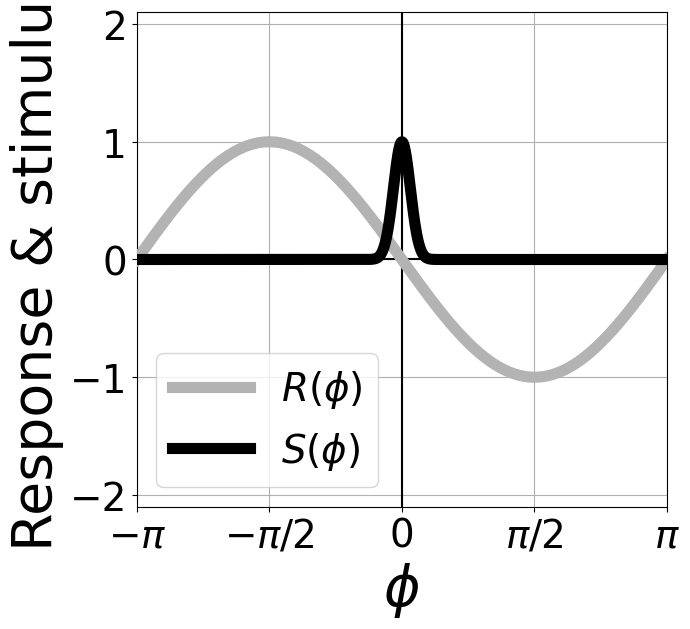

In [24]:
# Figure size
plt.rcParams["figure.figsize"] = 7., 6.4
fig, ax = plt.subplots()

# Parameters
param["phi*"] = 0.
param["s_sigma"] = 0.1

# Response
n_phases = 1000
phase_array = np.linspace(-np.pi, np.pi, n_phases)
r = np.sin(-phase_array)
ax.plot(phase_array, r, c='0.7', lw=8, label='$R(\phi)$', zorder=3)

# Stimulus
s = fct.gaussian(phase_array, param["phi*"], param["s_sigma"])
ax.plot(phase_array, s, c='k', lw=8, label='$S(\phi)$', zorder=4)

# Axes, ticks, grid, legend
ax.set_xlabel('$\phi$', fontsize=40)
ax.set_ylabel('Response & stimulus', fontsize=40)
ax.set_xlim([-np.pi, np.pi])
ax.set_xticks([-np.pi, -np.pi*0.5, 0., np.pi*0.5, np.pi])
ax.set_xticklabels(['$-\pi$', '$-\pi/2$', '0','$\pi/2$',  '$\pi$'])
ax.set_ylim([-2.1, 2.1])
ax.tick_params(labelsize=28)
ax.grid()
ax.axhline(c='k', zorder=2)
ax.axvline(c='k', zorder=2)
ax.legend(loc=3, fontsize=28)

# Save the figure
fig.tight_layout()
fig.savefig('Figures/FIG_5C.pdf', dpi=300)

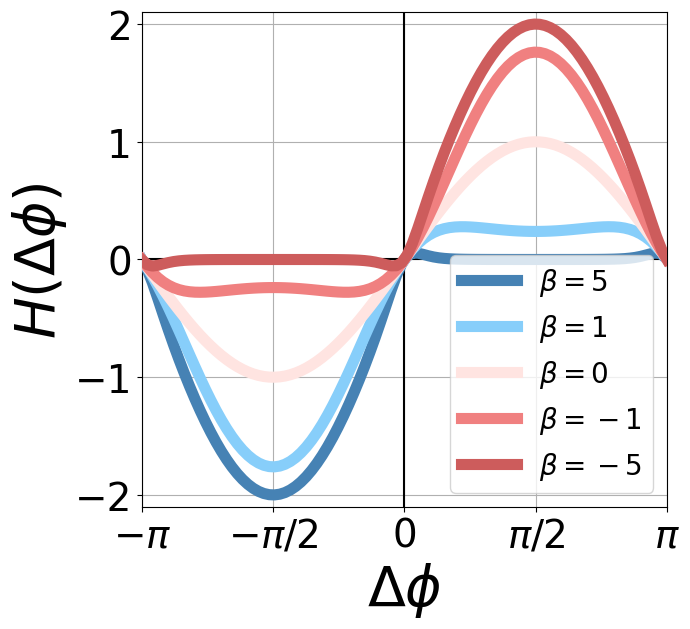

In [25]:
# Figure size
plt.rcParams["figure.figsize"] = 7., 6.4
fig, ax = plt.subplots()

# Phases
n_phases = 100
phase_array = np.linspace(-np.pi, np.pi, n_phases)

# Rectified Kuramoto coupling 1
param["beta"] = 5.
ax.plot(phase_array, [fct.H_RK(0., phase_array[k], param) for k in range(n_phases)], c='steelblue', lw=8, zorder=3, label=r'$\beta=5$')

# Rectified Kuramoto coupling 2
param["beta"] = 1.
ax.plot(phase_array, [fct.H_RK(0., phase_array[k], param) for k in range(n_phases)], c='lightskyblue', lw=8, zorder=3, label=r'$\beta=1$')

# Rectified Kuramoto coupling 3 (Kuramoto)
param["beta"] = 0.
ax.plot(phase_array, [fct.H_RK(0., phase_array[k], param) for k in range(n_phases)], c='mistyrose', lw=8, zorder=3, label=r'$\beta=0$')

# Rectified Kuramoto coupling 4
param["beta"] = -1.
ax.plot(phase_array, [fct.H_RK(0., phase_array[k], param) for k in range(n_phases)], c='lightcoral', lw=8, zorder=3, label=r'$\beta=-1$')

# Rectified Kuramoto coupling 5
param["beta"] = -5.
ax.plot(phase_array, [fct.H_RK(0., phase_array[k], param) for k in range(n_phases)], c='indianred', lw=8, zorder=3, label=r'$\beta=-5$')

# TAxes, ticks, grid, legend
ax.set_ylabel('$H(\Delta \phi)$', fontsize=40)
ax.set_ylim([-2.1, 2.1])
ax.set_yticks([-2., -1., 0., 1., 2.])
ax.set_xlabel('$\Delta \phi$', fontsize=40)
ax.set_xlim([-np.pi, np.pi])
ax.set_xticks([-np.pi, -np.pi*0.5, 0., np.pi*0.5, np.pi])
ax.set_xticklabels(['$-\pi$', '$-\pi/2$', '0','$\pi/2$',  '$\pi$'])
ax.tick_params(labelsize=28)
ax.grid()
ax.axhline(c='k', zorder=2)
ax.axvline(c='k', zorder=2)
ax.legend(loc=4, fontsize=20)

# Save the figure
fig.tight_layout()
fig.savefig('Figures/FIG_5E.pdf', dpi=300)

<br>

**3.2 Time series simulations**

We now perform simulations of the synchronization models by using the `integrate` function, which takes as inputs the coupling function that we wish to include in the ODE that we'll integrate, as well as the parameter dictionary. The `integrate` function uses the Euler algorithm and returns two outputs: the array of time points, and the array of simulation results, i.e. the phase of the two coupled oscillators at each time point.

Below, we use the `integrate` function with the `H_KS` coupling function to simulate the Kuramoto-Sakaguchi model with various initial conditions. We then use the `ts_plot` function to plot time series of the simulation results (Fig. S10A).

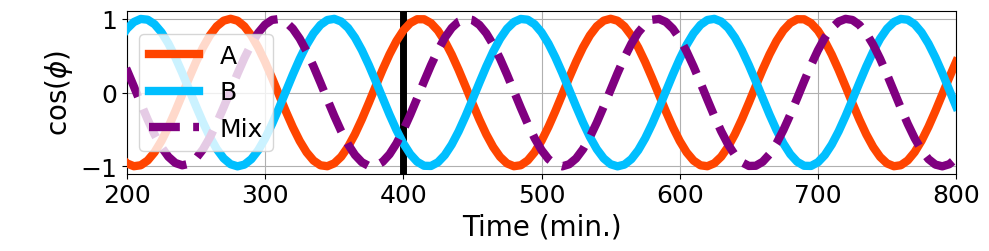

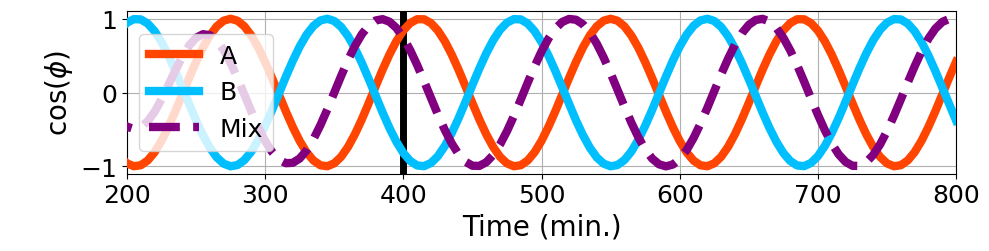

In [26]:
# Parameters
param["alpha"] = -1.
param["c"] = 0.015

# Initial phases very close to anti-phase
initial_phiA = 0.
initial_phiB = 2.9

# A
param["init_phi_A"] = initial_phiA
param["init_phi_B"] = initial_phiA
times, results_A = fct.integrate(fct.H_KS, param)

# B
param["init_phi_A"] = initial_phiB
param["init_phi_B"] = initial_phiB
times, results_B = fct.integrate(fct.H_KS, param)

# AB (mix)
param["init_phi_A"] = initial_phiA
param["init_phi_B"] = initial_phiB
times, results_AB = fct.integrate(fct.H_KS, param)

# Cosines
cos_A = 0.5*(np.cos(results_A[0])+np.cos(results_A[1]))
cos_B = 0.5*(np.cos(results_B[0])+np.cos(results_B[1]))
cos_AB = 0.5*(np.cos(results_AB[0])+np.cos(results_AB[1]))

# Time series
fct.ts_plot(times, np.array([cos_A, cos_B, cos_AB]), 'FIG_S8A_pt1', sim=True)



# Initial phases even closer to anti-phase
initial_phiA = 0.
initial_phiB = 3.1

# A
param["init_phi_A"] = initial_phiA
param["init_phi_B"] = initial_phiA
times, results_A = fct.integrate(fct.H_KS, param)

# B
param["init_phi_A"] = initial_phiB
param["init_phi_B"] = initial_phiB
times, results_B = fct.integrate(fct.H_KS, param)

# AB (mix)
param["init_phi_A"] = initial_phiA
param["init_phi_B"] = initial_phiB
times, results_AB = fct.integrate(fct.H_KS, param)

# Cosines
cos_A = 0.5*(np.cos(results_A[0])+np.cos(results_A[1]))
cos_B = 0.5*(np.cos(results_B[0])+np.cos(results_B[1]))
cos_AB = 0.5*(np.cos(results_AB[0])+np.cos(results_AB[1]))

# Time series
fct.ts_plot(times, np.array([cos_A, cos_B, cos_AB]), 'FIG_S8A_pt2', sim=True)

<br>

We now repeat the same procedure with the `H_RK` coupling function to simulate our rectified Kuramoto model with various initial conditions (Fig. S8B).

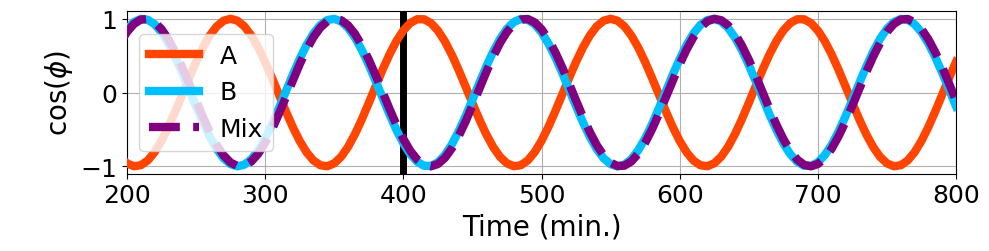

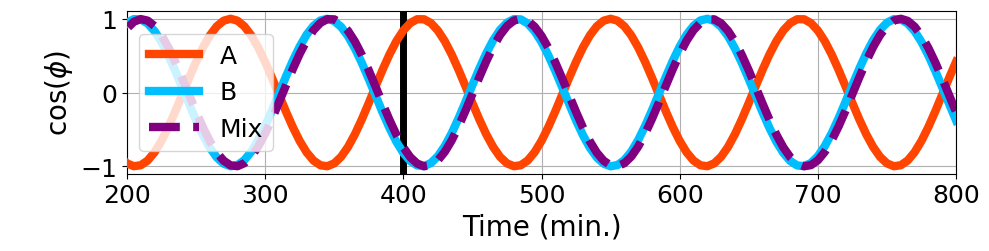

In [27]:
# Parameters
param["beta"] = -5.
param["c"] = 0.015

# Initial phases very close to anti-phase
initial_phiA = 0.
initial_phiB = 2.9

# A
param["init_phi_A"] = initial_phiA
param["init_phi_B"] = initial_phiA
times, results_A = fct.integrate(fct.H_RK, param)

# B
param["init_phi_A"] = initial_phiB
param["init_phi_B"] = initial_phiB
times, results_B = fct.integrate(fct.H_RK, param)

# AB (mix)
param["init_phi_A"] = initial_phiA
param["init_phi_B"] = initial_phiB
times, results_AB = fct.integrate(fct.H_RK, param)

# Cosines
cos_A = 0.5*(np.cos(results_A[0])+np.cos(results_A[1]))
cos_B = 0.5*(np.cos(results_B[0])+np.cos(results_B[1]))
cos_AB = 0.5*(np.cos(results_AB[0])+np.cos(results_AB[1]))

# Time series
fct.ts_plot(times, np.array([cos_A, cos_B, cos_AB]), 'FIG_S8B_pt1', sim=True)



# Initial phases even closer to anti-phase
initial_phiA = 0.
initial_phiB = 3.1

# A
param["init_phi_A"] = initial_phiA
param["init_phi_B"] = initial_phiA
times, results_A = fct.integrate(fct.H_RK, param)

# B
param["init_phi_A"] = initial_phiB
param["init_phi_B"] = initial_phiB
times, results_B = fct.integrate(fct.H_RK, param)

# AB (mix)
param["init_phi_A"] = initial_phiA
param["init_phi_B"] = initial_phiB
times, results_AB = fct.integrate(fct.H_RK, param)

# Cosines
cos_A = 0.5*(np.cos(results_A[0])+np.cos(results_A[1]))
cos_B = 0.5*(np.cos(results_B[0])+np.cos(results_B[1]))
cos_AB = 0.5*(np.cos(results_AB[0])+np.cos(results_AB[1]))

# Time series
fct.ts_plot(times, np.array([cos_A, cos_B, cos_AB]), 'FIG_S8B_pt2', sim=True)

<br>

We again repeat the same procedure, now with the `H_RR` coupling function to simulate the pulsed-coupling model with various initial conditions (Fig. S8C).

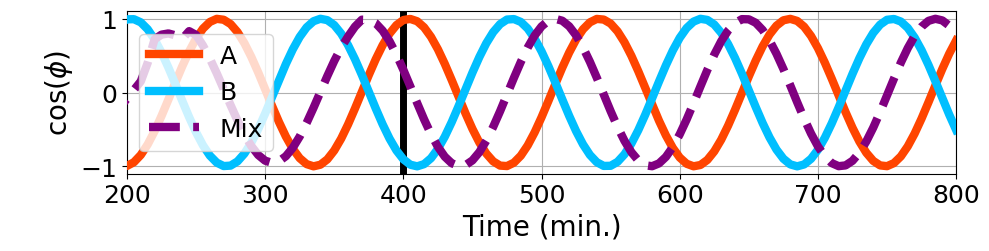

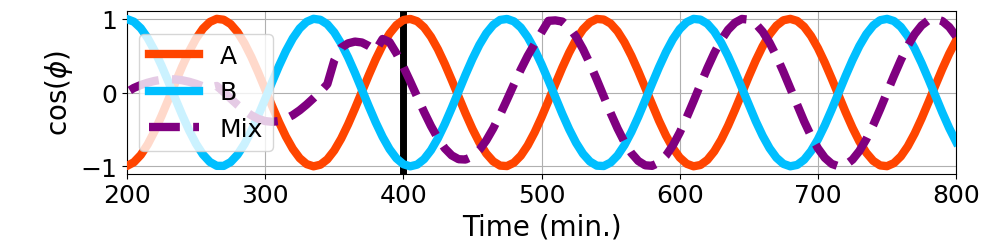

In [28]:
# Parameters
param["beta"] = 0.
param["c"] = 0.15
param["s_sigma"] = 0.1

# Initial phases very close to anti-phase
initial_phiA = 0.4
initial_phiB = 0.4 +2.9

# A
param["init_phi_A"] = initial_phiA
param["init_phi_B"] = initial_phiA
times, results_A = fct.integrate(fct.H_RR, param)

# B
param["init_phi_A"] = initial_phiB
param["init_phi_B"] = initial_phiB
times, results_B = fct.integrate(fct.H_RR, param)

# AB (mix)
param["init_phi_A"] = initial_phiA
param["init_phi_B"] = initial_phiB
times, results_AB = fct.integrate(fct.H_RR, param)

# Cosines
cos_A = 0.5*(np.cos(results_A[0])+np.cos(results_A[1]))
cos_B = 0.5*(np.cos(results_B[0])+np.cos(results_B[1]))
cos_AB = 0.5*(np.cos(results_AB[0])+np.cos(results_AB[1]))

# Time series
fct.ts_plot(times, np.array([cos_A, cos_B, cos_AB]), 'FIG_S8C_pt1', sim=True)



# Initial phases even closer to anti-phase
initial_phiA = 0.4
initial_phiB = 0.4 +3.1

# A
param["init_phi_A"] = initial_phiA
param["init_phi_B"] = initial_phiA
times, results_A = fct.integrate(fct.H_RR, param)

# B
param["init_phi_A"] = initial_phiB
param["init_phi_B"] = initial_phiB
times, results_B = fct.integrate(fct.H_RR, param)

# AB (mix)
param["init_phi_A"] = initial_phiA
param["init_phi_B"] = initial_phiB
times, results_AB = fct.integrate(fct.H_RR, param)

# Cosines
cos_A = 0.5*(np.cos(results_A[0])+np.cos(results_A[1]))
cos_B = 0.5*(np.cos(results_B[0])+np.cos(results_B[1]))
cos_AB = 0.5*(np.cos(results_AB[0])+np.cos(results_AB[1]))

# Time series
fct.ts_plot(times, np.array([cos_A, cos_B, cos_AB]), 'FIG_S8C_pt2', sim=True)

<br>

Below, we perform simulations of the ReKu model with different frequencies between oscillators A and B (Fig. S7A).

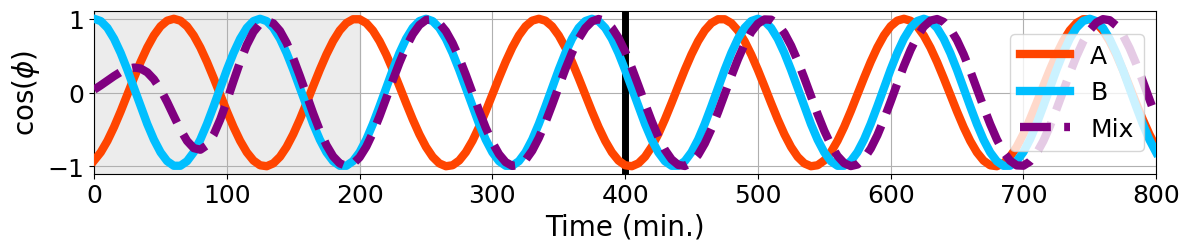

In [88]:
# Parameters
param["beta"] = -5.
param["c"] = 0.015

# Initial phases close to anti-phase
initial_phiA = np.pi+0.4
initial_phiB = 0.

# Frequency mismatch
omega_A = 0.0457
omega_B = 1.1*omega_A

# A
param["init_phi_A"] = initial_phiA
param["init_phi_B"] = initial_phiA
param["omega_A"] = omega_A
param["omega_B"] = omega_A
times, results_A = fct.integrate(fct.H_RK, param)

# B
param["init_phi_A"] = initial_phiB
param["init_phi_B"] = initial_phiB
param["omega_A"] = omega_B
param["omega_B"] = omega_B
times, results_B = fct.integrate(fct.H_RK, param)

# AB (mix)
param["init_phi_A"] = initial_phiA
param["init_phi_B"] = initial_phiB
param["omega_A"] = omega_A
param["omega_B"] = omega_B
times, results_AB = fct.integrate(fct.H_RK, param)

# Cosines
cos_A = 0.5*(np.cos(results_A[0])+np.cos(results_A[1]))
cos_B = 0.5*(np.cos(results_B[0])+np.cos(results_B[1]))
cos_AB = 0.5*(np.cos(results_AB[0])+np.cos(results_AB[1]))

# Sines
sin_A = 0.5*(np.sin(results_A[0])+np.sin(results_A[1]))
sin_B = 0.5*(np.sin(results_B[0])+np.sin(results_B[1]))
sin_AB = 0.5*(np.sin(results_AB[0])+np.sin(results_AB[1]))



# Initialize the figure
plt.rcParams["figure.figsize"] = 12., 2.6
fig, ax = plt.subplots()

# Time series
ax.plot(times, cos_A, c='orangered', label='A', lw=6, zorder=3)
ax.plot(times, cos_B, c='deepskyblue', label='B', lw=6, zorder=4)
ax.plot(times, cos_AB, c='purple', label='Mix', lw=6, ls='--', zorder=5)

# Line at the specified time point (polar plot)
ax.plot([400., 400.], [-1.1, 1.1], c='k', lw=5, zorder=2)

# Grey zone before t = 200 min
ax.fill_between([0., 200.], [-1.1, -1.1], [1.1, 1.1], color='grey', alpha=0.15)

# Axes, ticks, grid, legend
ax.set_xlabel('Time (min.)', fontsize=20)
ax.set_ylabel('cos($\phi$)', fontsize=20)
ax.set_xlim([0., 800.])
ax.set_ylim([-1.1, 1.1])
ax.tick_params(labelsize=18)
ax.grid(which='major')
ax.legend(loc=5, fontsize=18)

# Save the figure
fig.tight_layout()
fig.savefig('Figures/FIG_S7A.pdf', dpi=300)

<br>

**4. Visualize the synchronization outcome**

In this section, we explore different ways to visualize the synchronization outcome of both experiments and simulations.

**4.1 Experimental data**

We first visualize the synchronization outcome of the AB experiments by comparing the phase differences between the controls and the mix, labeled according to which control oscillator is ahead of the other (Fig. 4H).

In [31]:
# Get experiments' info
exp_type, exp_date, exp_dish, exp_dt, exp_t0 = fct.get_exp_info()

# List AB experiments' dates
AB_exp_date = []
for k in range(len(exp_date)):
    if (exp_type[k] != 'AB'):    continue
    AB_exp_date.append(exp_date[k])
AB_exp_date = np.unique(AB_exp_date)
n_AB_exp = len(AB_exp_date)

# Time
t = 400.

# Iterate over all AB experiments
phase_diff_exp = np.zeros((3,n_AB_exp))
for exp_i in range(n_AB_exp):
    
    # Get the phase arrays
    times, data = fct.get_data(AB_exp_date[exp_i], phase=True)
    
    # Adjust some experiments' time
    dt = 0.
    if (times[1]-times[0] == 10.) and not(times[0] % 10. == 0.):
        dt = 5.
    
    # Retrieve time index
    t_i = np.where(times == t+dt)[0]
    
    # Compute the phase differences at the selected time point
    phase_diff_exp[0,exp_i] = (data[0,t_i]-data[1,t_i]) %(2.*np.pi)
    phase_diff_exp[1,exp_i] = (data[0,t_i]-data[2,t_i]) %(2.*np.pi)
    phase_diff_exp[2,exp_i] = (data[1,t_i]-data[2,t_i]) %(2.*np.pi)
    
# Cast the phase differences between -π and π
phase_diff_exp[phase_diff_exp > np.pi] -= 2.*np.pi

# Label which oscillator is ahead / behind
phase_diff_exp_label = phase_diff_exp.copy()
phase_diff_exp_label[1,phase_diff_exp[0]< 0.] = phase_diff_exp[2,phase_diff_exp[0]< 0.]
phase_diff_exp_label[2,phase_diff_exp[0]< 0.] = phase_diff_exp[1,phase_diff_exp[0]< 0.]

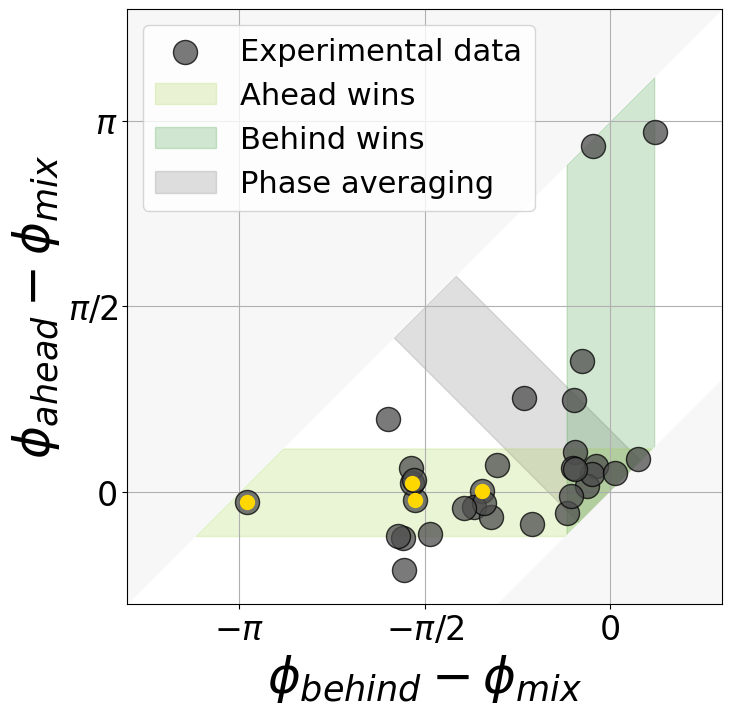

In [33]:
# Figure size
plt.rcParams["figure.figsize"] = 7.4, 7.4
fig, ax = plt.subplots()

# Phase differences
data = ax.scatter(phase_diff_exp_label[2], phase_diff_exp_label[1], facecolors='0.3', edgecolors='k', s=300, alpha=0.75, zorder=20, clip_on=False, label='Experimental data')

# Highlight experiments shown in Fig. 3B
ax.scatter(phase_diff_exp_label[2,1:5], phase_diff_exp_label[1,1:5], c='gold', s=100, zorder=21)

# Regions with different behaviors
alpha = 0.2
d1 = 0.37
d2 = d1/np.sqrt(2.)

# Phase averaging
avg = ax.fill_between([-0.5*np.pi-d2, -0.5*np.pi+d2, -d2, d2], [0.5*np.pi-d2, 0.5*np.pi-3.*d2, -d2, d2], [0.5*np.pi-d2, 0.5*np.pi+d2, 3.*d2, d2], color='grey', alpha=0.25, zorder=1, label='Phase averaging')

# Behind wins
behind = ax.fill_between([-d1, -d1, d1], [-d1, -d1, d1], [d1, np.pi-d1, np.pi+d1], color='forestgreen', alpha=alpha, zorder=1, label='Behind wins')

# Ahead wins
ahead = ax.fill_between([-np.pi-d1, -np.pi+d1, -d1, d1], [-d1, -d1, -d1, d1], [-d1, d1, d1, d1], color='yellowgreen', alpha=alpha, zorder=1, label='Ahead wins')

# Region with unphysical phase differences combinations
ax.fill_between([-1.5*np.pi, 0.5*np.pi], [-0.5*np.pi, 1.5*np.pi], [1.5*np.pi, 1.5*np.pi], color='0.97', zorder=1)
ax.fill_between([-np.pi, np.pi], [-np.pi, -np.pi], [-np.pi, np.pi], color='0.97', zorder=1)
ax.fill_between([-1.5*np.pi, -np.pi], [-np.pi, -np.pi], [-0.5*np.pi, -np.pi], color='0.97', zorder=1)
ax.fill_between([0.5*np.pi, np.pi], [1.5*np.pi, np.pi], [1.5*np.pi, 1.5*np.pi], color='0.97', zorder=1)

# Axes, ticks, grid, legend
ax.set_xlim([-1.3*np.pi, 0.3*np.pi])
ax.set_ylim([-0.3*np.pi, 1.3*np.pi])
ax.set_xticks([-np.pi, -0.5*np.pi, 0.])
ax.set_xticklabels(['$-\pi$', '$-\pi/2$', '0'])
ax.set_yticks([0., 0.5*np.pi, np.pi])
ax.set_yticklabels(['0', '$\pi/2$', '$\pi$'])
ax.tick_params(labelsize=24)
ax.set_aspect(aspect=1)
ax.grid(which='both')   
ax.set_ylabel("$\phi_{ahead}-\phi_{mix}$", fontsize=36)
ax.set_xlabel("$\phi_{behind}-\phi_{mix}$", fontsize=36)
ax.legend(handles=[data, ahead, behind, avg], loc=2, fontsize=22)

# Save the figure
fig.tight_layout()
fig.savefig('Figures/FIG_4H.pdf', dpi=300)

<br>

**4.2 Model simulations**

We now generate the same plot as above, but for model simulations. To compute the simulations' phase differences, we use the `get_phase_diff` function, which takes as inputs the coupling function of the model we wish to simulate and the parameter dictionary. You can also specify whether you want to label the phase differences according to which control oscillator is ahead of the other. Note that the `get_phase_diff` function relies on the `integrate_last` function to perform the integration. The `integrate_last` function is very similar to the `integrate` function, but instead of returning the full array of simulation results at every time point, it returns only the simulation results at the last time point.

Below, we use the `get_phase_diff` function with the `H_RK` coupling function to obtain the phase differences of our rectified Kuramoto model with different values of parameter $\beta$. We then plot these phase differences to reproduce Fig. 5F.

In [34]:
# Parameters
param["c"] = 0.015
param["total_t"] = 405.

# Rectified Kuramoto coupling 1
param["beta"] = 5.
phase_diff_RK1 = fct.get_phase_diff(fct.H_RK, param)

# Rectified Kuramoto coupling 2
param["beta"] = 1.
phase_diff_RK2 = fct.get_phase_diff(fct.H_RK, param)

# Rectified Kuramoto coupling 3
param["beta"] = 0.
phase_diff_RK3 = fct.get_phase_diff(fct.H_RK, param)

# Rectified Kuramoto coupling 4
param["beta"] = -1.
phase_diff_RK4 = fct.get_phase_diff(fct.H_RK, param)

# Rectified Kuramoto coupling 5
param["beta"] = -5.
phase_diff_RK5 = fct.get_phase_diff(fct.H_RK, param)

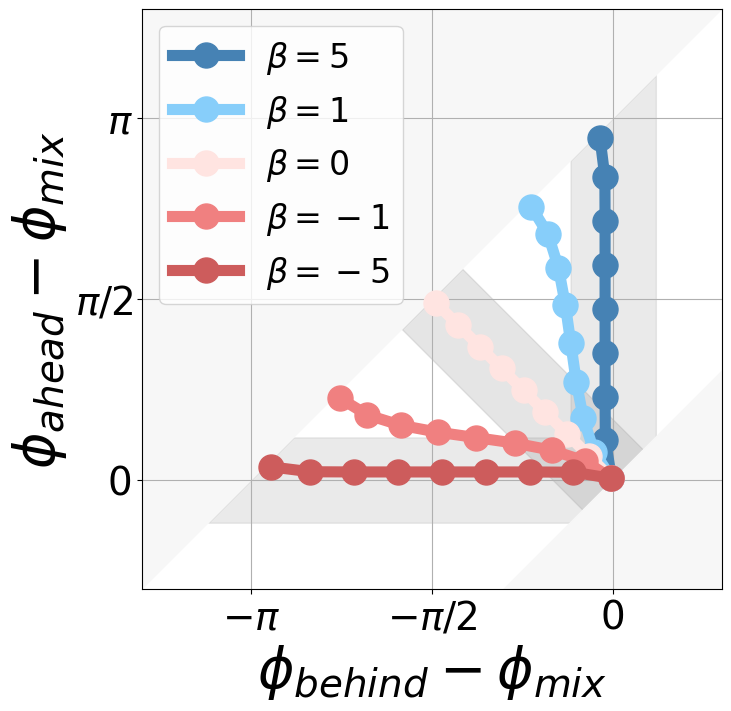

In [36]:
# Figure size
plt.rcParams["figure.figsize"] = 7.4, 7.4
fig, ax = plt.subplots()

# Phase differences
ax.plot(phase_diff_RK1[2,1::12], phase_diff_RK1[1,1::12], c='steelblue', lw=8, marker='o', markersize=18, zorder=20, label=r'$\beta=5$')
ax.plot(phase_diff_RK2[2,1::12], phase_diff_RK2[1,1::12], c='lightskyblue', lw=8, marker='o', markersize=18, zorder=20, label=r'$\beta=1$')
ax.plot(phase_diff_RK3[2,1::12], phase_diff_RK3[1,1::12], c='mistyrose', lw=8, marker='o', markersize=18, zorder=20, label=r'$\beta=0$')
ax.plot(phase_diff_RK4[2,1::12], phase_diff_RK4[1,1::12], c='lightcoral', lw=8, marker='o', markersize=18, zorder=20, label=r'$\beta=-1$')
ax.plot(phase_diff_RK5[2,1::12], phase_diff_RK5[1,1::12], c='indianred', lw=8, marker='o', markersize=18, zorder=20, label=r'$\beta=-5$')

# Regions with different behaviors
d1 = 0.37
d2 = d1/np.sqrt(2.)

# Phase averaging
ax.fill_between([-0.5*np.pi-d2, -0.5*np.pi+d2, -d2, d2], [0.5*np.pi-d2, 0.5*np.pi-3.*d2, -d2, d2], [0.5*np.pi-d2, 0.5*np.pi+d2, 3.*d2, d2], color='0.6', alpha=0.25, zorder=1)

# Winner-takes-all
ax.fill_between([-np.pi-d1, -np.pi+d1, -d1, -d1, d1], [-d1, -d1, -d1, -d1, d1], [-d1, d1, d1, np.pi-d1, np.pi+d1], color='0.6', alpha=0.2, zorder=1)

# Region with unphysical phase differences combinations
ax.fill_between([-1.5*np.pi, 0.5*np.pi], [-0.5*np.pi, 1.5*np.pi], [1.5*np.pi, 1.5*np.pi], color='0.97', zorder=1)
ax.fill_between([-np.pi, np.pi], [-np.pi, -np.pi], [-np.pi, np.pi], color='0.97', zorder=1)
ax.fill_between([-1.5*np.pi, -np.pi], [-np.pi, -np.pi], [-0.5*np.pi, -np.pi], color='0.97', zorder=1)
ax.fill_between([0.5*np.pi, np.pi], [1.5*np.pi, np.pi], [1.5*np.pi, 1.5*np.pi], color='0.97', zorder=1)

# Axes, ticks, grid, legend
ax.set_xlim([-1.3*np.pi, 0.3*np.pi])
ax.set_ylim([-0.3*np.pi, 1.3*np.pi])
ax.set_xticks([-np.pi, -0.5*np.pi, 0.])
ax.set_xticklabels(['$-\pi$', '$-\pi/2$', '0'])
ax.set_yticks([0., 0.5*np.pi, np.pi])
ax.set_yticklabels(['0', '$\pi/2$', '$\pi$'])
ax.tick_params(labelsize=28)
ax.set_aspect(aspect=1)
ax.grid(which='both')   
ax.set_ylabel("$\phi_{ahead}-\phi_{mix}$", fontsize=40)
ax.set_xlabel("$\phi_{behind}-\phi_{mix}$", fontsize=40)
ax.legend(loc=2, fontsize=24)

# Save the figure
fig.tight_layout()
fig.savefig('Figures/FIG_5F.pdf', dpi=300)

<br>

We now repeat the same procudre with the `H_KS` coupling function to plot the synchronization outcome of the Kuramoto-Sakaguchi model with different values of parameter $\alpha$ (Fig. 5B).

In [37]:
# Parameters
param["c"] = 0.015
param["total_t"] = 405.

# Kuramoto-Sakaguchi coupling 1
param["alpha"] = 1.
phase_diff_KS1 = fct.get_phase_diff(fct.H_KS, param)

# Kuramoto-Sakaguchi coupling 2
param["alpha"] = 0.5
phase_diff_KS2 = fct.get_phase_diff(fct.H_KS, param)

# Kuramoto-Sakaguchi coupling 3
param["alpha"] = 0.
phase_diff_KS3 = fct.get_phase_diff(fct.H_KS, param)

# Kuramoto-Sakaguchi coupling 4
param["alpha"] = -0.5
phase_diff_KS4 = fct.get_phase_diff(fct.H_KS, param)

# Kuramoto-Sakaguchi coupling 5
param["alpha"] = -1.
phase_diff_KS5 = fct.get_phase_diff(fct.H_KS, param)

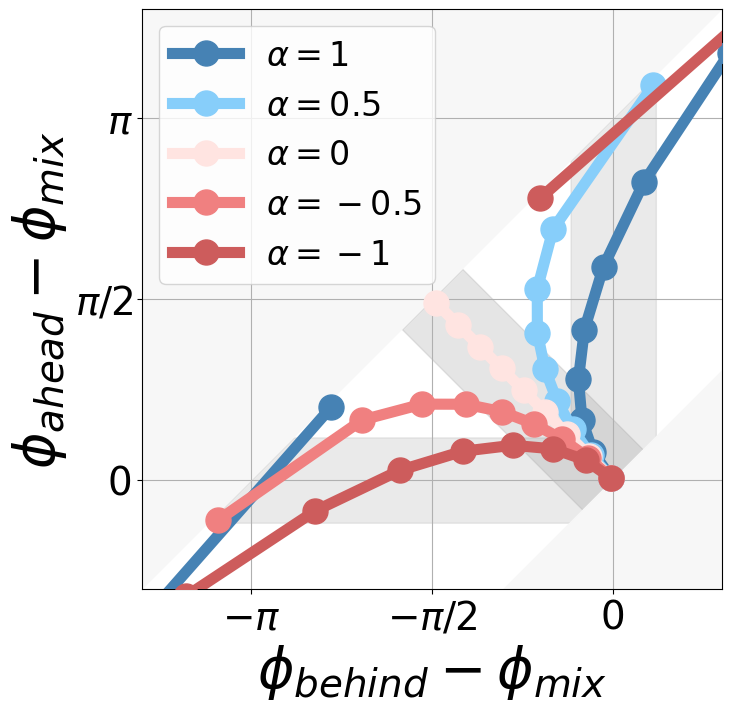

In [38]:
# Figure size
plt.rcParams["figure.figsize"] = 7.4, 7.4
fig, ax = plt.subplots()

# Make some adjustments
KS1 = phase_diff_KS1[:,1::12].copy()
KS2 = phase_diff_KS2[:,1::12].copy()
KS3 = phase_diff_KS3[:,1::12].copy()
KS4 = phase_diff_KS4[:,1::12].copy()
KS5 = phase_diff_KS5[:,1::12].copy()

KS1[2,-1:] += 2.*np.pi
KS1[1,-2:] += 2.*np.pi
KS2[1,-1:] += 2.*np.pi
KS4[2,-1:] -= 2.*np.pi
KS5[2,-2:] -= 2.*np.pi
KS5[1,-1:] -= 2.*np.pi

# Phase differences
ax.plot(KS1[2], KS1[1], c='steelblue', lw=8, marker='o', markersize=18, zorder=20, label=r'$\alpha=1$')
ax.plot(KS1[2,-2:]-2.*np.pi, KS1[1,-2:]-2.*np.pi, c='steelblue', lw=8, marker='o', markersize=18, zorder=20)
ax.plot(KS2[2], KS2[1], c='lightskyblue', lw=8, marker='o', markersize=18, zorder=20, label=r'$\alpha=0.5$')
ax.plot(KS3[2], KS3[1], c='mistyrose', lw=8, marker='o', markersize=18, zorder=20, label=r'$\alpha=0$')
ax.plot(KS4[2], KS4[1], c='lightcoral', lw=8, marker='o', markersize=18, zorder=20, label=r'$\alpha=-0.5$')
ax.plot(KS5[2], KS5[1], c='indianred', lw=8, marker='o', markersize=18, zorder=20, label=r'$\alpha=-1$')
ax.plot(KS5[2,-2:]+2.*np.pi, KS5[1,-2:]+2.*np.pi, c='indianred', lw=8, marker='o', markersize=18, zorder=20)

# Regions with different behaviors
d1 = 0.37
d2 = d1/np.sqrt(2.)

# Phase averaging
ax.fill_between([-0.5*np.pi-d2, -0.5*np.pi+d2, -d2, d2], [0.5*np.pi-d2, 0.5*np.pi-3.*d2, -d2, d2], [0.5*np.pi-d2, 0.5*np.pi+d2, 3.*d2, d2], color='0.6', alpha=0.25, zorder=1)

# Winner-takes-all
ax.fill_between([-np.pi-d1, -np.pi+d1, -d1, -d1, d1], [-d1, -d1, -d1, -d1, d1], [-d1, d1, d1, np.pi-d1, np.pi+d1], color='0.6', alpha=0.2, zorder=1)

# Region with unphysical phase differences combinations
ax.fill_between([-1.5*np.pi, 0.5*np.pi], [-0.5*np.pi, 1.5*np.pi], [1.5*np.pi, 1.5*np.pi], color='0.97', zorder=1)
ax.fill_between([-np.pi, np.pi], [-np.pi, -np.pi], [-np.pi, np.pi], color='0.97', zorder=1)
ax.fill_between([-1.5*np.pi, -np.pi], [-np.pi, -np.pi], [-0.5*np.pi, -np.pi], color='0.97', zorder=1)
ax.fill_between([0.5*np.pi, np.pi], [1.5*np.pi, np.pi], [1.5*np.pi, 1.5*np.pi], color='0.97', zorder=1)

# Axes, ticks, grid, legend
ax.set_xlim([-1.3*np.pi, 0.3*np.pi])
ax.set_ylim([-0.3*np.pi, 1.3*np.pi])
ax.set_xticks([-np.pi, -0.5*np.pi, 0.])
ax.set_xticklabels(['$-\pi$', '$-\pi/2$', '0'])
ax.set_yticks([0., 0.5*np.pi, np.pi])
ax.set_yticklabels(['0', '$\pi/2$', '$\pi$'])
ax.tick_params(labelsize=28)
ax.set_aspect(aspect=1)
ax.grid(which='both')   
ax.set_ylabel("$\phi_{ahead}-\phi_{mix}$", fontsize=40)
ax.set_xlabel("$\phi_{behind}-\phi_{mix}$", fontsize=40)
ax.legend(loc=2, fontsize=24)

# Save the figure
fig.tight_layout()
fig.savefig('Figures/FIG_5B.pdf', dpi=300)

<br>

We now compute the phase differences of the pulsed-coupling model with different values of the coupling strength $c$. Because the pulsed-coupling model's coupling term depends on both control oscillators' phases separately, instead of depending only on their phase difference as is the case of the Kuramoto-Sakaguchi and the rectified Kuramoto models, we need to perform simulations with a much larger number of initial phases to visualize all possible synchronization outcomes. For this reason, we use a slightly modified version of the `get_phase_diff` function found in the `get_phase_diff_RR` python code. When running the `get_phase_diff_RR` code, you need to specify the value of parameter $\beta$ (set it to 0 to simulate the pulsed-coupling model described in the main text, or to any other value to simulate our rectified pulsed-coupling model described in the SI) and the coupling strength $c$.

Below, we use directly the phase difference data obtained when running the `get_phase_diff_RR` python code, simply because running this code takes several minutes, which is impractical for a Jupyter notebook. After importing the data for different coupling strengths $c$, we plot the phase differences and reproduce Fig. 5D.

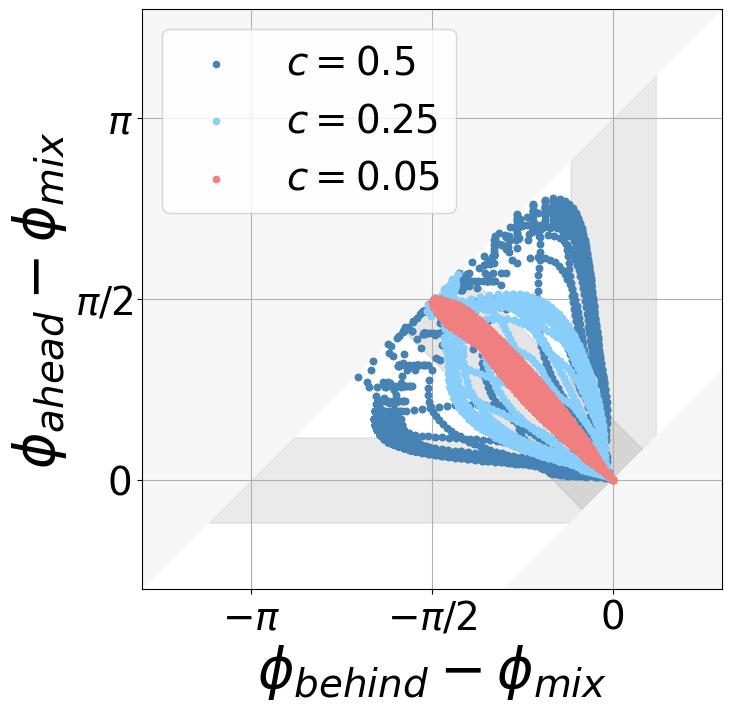

In [39]:
# Figure size
plt.rcParams["figure.figsize"] = 7.4, 7.4
fig, ax = plt.subplots()

# Import the data
phase_diff_RR1 = np.genfromtxt('Phase_diff_data/Phase_diff_sync_outcome_RR_beta=0.0_c=0.5.txt')
phase_diff_RR2 = np.genfromtxt('Phase_diff_data/Phase_diff_sync_outcome_RR_beta=0.0_c=0.25.txt')
phase_diff_RR3 = np.genfromtxt('Phase_diff_data/Phase_diff_sync_outcome_RR_beta=0.0_c=0.05.txt')

# Phase differences
ax.scatter(phase_diff_RR1[2], phase_diff_RR1[1], c='steelblue', s=20, zorder=20, label=r'$c=0.5$')
ax.scatter(phase_diff_RR2[2], phase_diff_RR2[1], c='lightskyblue', s=20, zorder=20, label=r'$c=0.25$')
ax.scatter(phase_diff_RR3[2], phase_diff_RR3[1], c='lightcoral', s=20, zorder=20, label=r'$c=0.05$')

# Regions with different behaviors
d1 = 0.37
d2 = d1/np.sqrt(2.)

# Phase averaging
ax.fill_between([-0.5*np.pi-d2, -0.5*np.pi+d2, -d2, d2], [0.5*np.pi-d2, 0.5*np.pi-3.*d2, -d2, d2], [0.5*np.pi-d2, 0.5*np.pi+d2, 3.*d2, d2], color='0.6', alpha=0.25, zorder=1)

# Winner-takes-all
ax.fill_between([-np.pi-d1, -np.pi+d1, -d1, -d1, d1], [-d1, -d1, -d1, -d1, d1], [-d1, d1, d1, np.pi-d1, np.pi+d1], color='0.6', alpha=0.2, zorder=1)

# Region with unphysical phase differences combinations
ax.fill_between([-1.5*np.pi, 0.5*np.pi], [-0.5*np.pi, 1.5*np.pi], [1.5*np.pi, 1.5*np.pi], color='0.97', zorder=1)
ax.fill_between([-np.pi, np.pi], [-np.pi, -np.pi], [-np.pi, np.pi], color='0.97', zorder=1)
ax.fill_between([-1.5*np.pi, -np.pi], [-np.pi, -np.pi], [-0.5*np.pi, -np.pi], color='0.97', zorder=1)
ax.fill_between([0.5*np.pi, np.pi], [1.5*np.pi, np.pi], [1.5*np.pi, 1.5*np.pi], color='0.97', zorder=1)

# Axes, ticks, grid, legend
ax.set_xlim([-1.3*np.pi, 0.3*np.pi])
ax.set_ylim([-0.3*np.pi, 1.3*np.pi])
ax.set_xticks([-np.pi, -0.5*np.pi, 0.])
ax.set_xticklabels(['$-\pi$', '$-\pi/2$', '0'])
ax.set_yticks([0., 0.5*np.pi, np.pi])
ax.set_yticklabels(['0', '$\pi/2$', '$\pi$'])
ax.tick_params(labelsize=28)
ax.set_aspect(aspect=1)
ax.grid(which='both')   
ax.set_ylabel("$\phi_{ahead}-\phi_{mix}$", fontsize=40)
ax.set_xlabel("$\phi_{behind}-\phi_{mix}$", fontsize=40)
ax.legend(loc=2, fontsize=28)

# Save the figure
fig.tight_layout()
fig.savefig('Figures/FIG_5D.pdf', dpi=300)

<br>

**4.3 Summary plot combining experimental data and model simulations**

The figure that we generate below, Fig. 5G, shows the synchronization outcome of our rectified Kuramoto model in a different way: we compare the phase difference between the mix and any of the two controls with the phase difference between the two controls. We also cast the AB experiments' phase differences in the same format, compute their average, and add them to the plot for comparison with simulation results.

In [40]:
# Model simulations

# Parameters
param["c"] = 0.015
param["total_t"] = 405.

# Rectified Kuramoto coupling 1
param["beta"] = 5.
phase_diff_RK1 = fct.get_phase_diff(fct.H_RK, param, label=False)

# Rectified Kuramoto coupling 2
param["beta"] = 1.
phase_diff_RK2 = fct.get_phase_diff(fct.H_RK, param, label=False)

# Rectified Kuramoto coupling 3
param["beta"] = 0.
phase_diff_RK3 = fct.get_phase_diff(fct.H_RK, param, label=False)

# Rectified Kuramoto coupling 4
param["beta"] = -1.
phase_diff_RK4 = fct.get_phase_diff(fct.H_RK, param, label=False)

# Rectified Kuramoto coupling 5
param["beta"] = -5.
phase_diff_RK5 = fct.get_phase_diff(fct.H_RK, param, label=False)

In [41]:
# Experimental data

# Concatenate arrays
phase_diff_exp_1_2 = np.concatenate((phase_diff_exp[0], -phase_diff_exp[0]))
phase_diff_exp_1_M = np.concatenate((phase_diff_exp[1], phase_diff_exp[2]))

# Bins
bin_bounds = np.linspace(-np.pi, np.pi, 13)
bin_avg = bin_bounds[:-1] +np.pi/12.

# Binned phase differences
bin_exp_1_M = [[] for k in range(len(bin_avg))]
for k in range(len(phase_diff_exp_1_2)):
    for j in range(len(bin_avg)):
        if phase_diff_exp_1_2[k] >= bin_bounds[j] and phase_diff_exp_1_2[k] < bin_bounds[j+1]:
            bin_exp_1_M[j].append(phase_diff_exp_1_M[k])
            break

# Bin average
bin_exp_1_M_avg = np.zeros(len(bin_avg))
for j in range(len(bin_avg)):
    if len(bin_exp_1_M[j]) >0:
        bin_exp_1_M_avg[j] = np.mean(bin_exp_1_M[j])

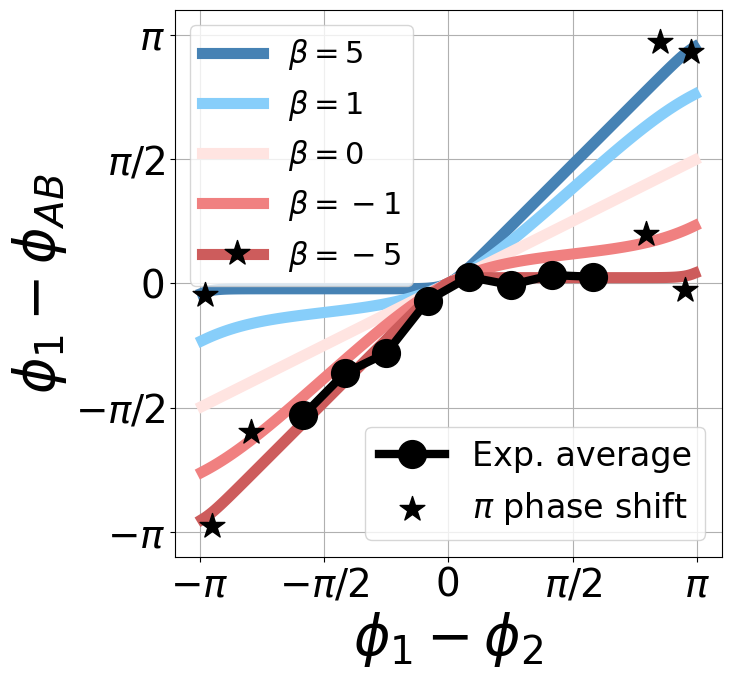

In [42]:
# Figure size
plt.rcParams["figure.figsize"] = 7.4, 7.4
fig, ax = plt.subplots()

# Phase differences
RK_plot1, = ax.plot(phase_diff_RK1[0,:-1], phase_diff_RK1[1,:-1], c='steelblue', lw=8)
ax.plot(-phase_diff_RK1[0,:-1], phase_diff_RK1[2,:-1], c='steelblue', lw=8)
RK_plot2, = ax.plot(phase_diff_RK2[0,:-1], phase_diff_RK2[1,:-1], c='lightskyblue', lw=8)
ax.plot(-phase_diff_RK2[0,:-1], phase_diff_RK2[2,:-1], c='lightskyblue', lw=8)
RK_plot3, = ax.plot(phase_diff_RK3[0,:-1], phase_diff_RK3[1,:-1], c='mistyrose', lw=8)
ax.plot(-phase_diff_RK3[0,:-1], phase_diff_RK3[2,:-1], c='mistyrose', lw=8)
RK_plot4, = ax.plot(phase_diff_RK4[0,:-1], phase_diff_RK4[1,:-1], c='lightcoral', lw=8)
ax.plot(-phase_diff_RK4[0,:-1], phase_diff_RK4[2,:-1], c='lightcoral', lw=8)
RK_plot5, = ax.plot(phase_diff_RK5[0,:-1], phase_diff_RK5[1,:-1], c='indianred', lw=8)
ax.plot(-phase_diff_RK5[0,:-1], phase_diff_RK5[2,:-1], c='indianred', lw=8)

# Experimental data
data = ax.scatter(phase_diff_exp_1_2[[0,1,27,30,32,33,59,62]], phase_diff_exp_1_M[[0,1,27,30,32,33,59,62]], c='k', marker='*', s=350, alpha=1, zorder=10)
avg, = ax.plot(bin_avg[2:-2], bin_exp_1_M_avg[2:-2], c='k', lw=6, marker='o', markersize=20)

# Legend
legend1 = ax.legend([RK_plot1, RK_plot2, RK_plot3, RK_plot4, RK_plot5], [r'$\beta=5$', r'$\beta=1$', r'$\beta=0$', r'$\beta=-1$', r'$\beta=-5$'], loc=2, fontsize=22)
plt.gca().add_artist(legend1)
ax.legend([avg, data], ['Exp. average', '$\pi$ phase shift'], loc=4, fontsize=24)

# Axes, ticks, grid
ax.set_xlabel("$\phi_1-\phi_2$", fontsize=40)
ax.set_ylabel("$\phi_1-\phi_{AB}$", fontsize=40)
ax.set_xlim([-1.1*np.pi, 1.1*np.pi])
ax.set_ylim([-1.1*np.pi, 1.1*np.pi])
ax.set_xticks([-np.pi, -0.5*np.pi, 0., 0.5*np.pi, np.pi])
ax.set_xticklabels(['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
ax.set_yticks([-np.pi, -0.5*np.pi, 0., 0.5*np.pi, np.pi])
ax.set_yticklabels(['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
ax.tick_params(labelsize=28)
ax.set_aspect(aspect=1)
ax.grid()

# Save the figure 
fig.tight_layout()
fig.savefig('Figures/FIG_5G.pdf', dpi=300)

<br>

**5. Mimick experiments' period and initial phase distributions**

In this section, we perform simulations with a period distribution and an initial phase distribution similar to the AB experiments' distributions.

**5.1 Visualize the synchronization outcome**

Below, we reproduce Fig. 5H, which mimicks Fig. 4H, but rather than showing the 32 experimental phase differences, it shows the phase differences of 32 simulations of our rectified Kuramoto model with $\beta=-5$.

In [43]:
seed = 43587
np.random.seed(seed)
n_AB_exp = 32

# Parameters
param["beta"] = -5.
param["c"] = 0.015
param["total_t"] = 805.
param["dt"] = 0.1
param["n_skr"] = 50

# Simulations
RK_sim_phase, RK_sim_phase_diff = [], []
for k in range(n_AB_exp):
    
    # Random initial phase for A
    if (np.random.binomial(1, 67./85.) == 1):
        init_phiA = np.random.uniform(np.pi/3., 4.*np.pi/3.)
        
    else:
        init_phiA = np.random.uniform(-2.*np.pi/3., np.pi/3.)
        
    # Random initial phase for B
    if (np.random.binomial(1, 67./85.) == 1):
        init_phiB = np.random.uniform(np.pi/3., 4.*np.pi/3.)
        
    else:
        init_phiB = np.random.uniform(-2.*np.pi/3., np.pi/3.)
    
    # Random frequencies
    T_A = np.random.normal(140., 9.8)
    T_B = T_A +np.random.normal(-1.6, 7.4)
    omegaA = 2.*np.pi/T_A
    omegaB = 2.*np.pi/T_B

    # A
    param["init_phi_A"] = init_phiA
    param["init_phi_B"] = init_phiA
    param["omega_A"] = omegaA
    param["omega_B"] = omegaA
    times_sim, results_A = fct.integrate(fct.H_RK, param)

    # B
    param["init_phi_A"] = init_phiB
    param["init_phi_B"] = init_phiB
    param["omega_A"] = omegaB
    param["omega_B"] = omegaB
    times_sim, results_B = fct.integrate(fct.H_RK, param)

    # AB (mix)
    param["init_phi_A"] = init_phiA
    param["init_phi_B"] = init_phiB
    param["omega_A"] = omegaA
    param["omega_B"] = omegaB
    times_sim, results_AB = fct.integrate(fct.H_RK, param)

    # Phases
    phi_A = fct.compute_phase_mix(results_A[0], results_A[1])
    phi_B = fct.compute_phase_mix(results_B[0], results_B[1])
    phi_AB = fct.compute_phase_mix(results_AB[0], results_AB[1])
        
    # Phase differences
    dphi_A_B = (phi_A-phi_B)
    dphi_A_AB = (phi_A-phi_AB)
    dphi_B_AB = (phi_B-phi_AB)
        
    # Store the results
    RK_sim_phase.append(np.array([phi_A, phi_B, phi_AB]))
    RK_sim_phase_diff.append(np.array([dphi_A_B, dphi_A_AB, dphi_B_AB]))
    
# Cast the phases between -π and π
RK_sim_phase = np.array(RK_sim_phase) %(2.*np.pi)
RK_sim_phase[RK_sim_phase > np.pi] -= 2.*np.pi

# Cast the phase differences between -π and π
RK_sim_phase_diff = np.array(RK_sim_phase_diff) %(2.*np.pi)
RK_sim_phase_diff[RK_sim_phase_diff > np.pi] -= 2.*np.pi

# Label which oscillator is ahead / behind
RK_sim_phase_diff_label = RK_sim_phase_diff.copy()
RK_sim_phase_diff_label[:,1][RK_sim_phase_diff[:,0]<0.] = RK_sim_phase_diff[:,2][RK_sim_phase_diff[:,0]<0.]
RK_sim_phase_diff_label[:,2][RK_sim_phase_diff[:,0]<0.] = RK_sim_phase_diff[:,1][RK_sim_phase_diff[:,0]<0.]

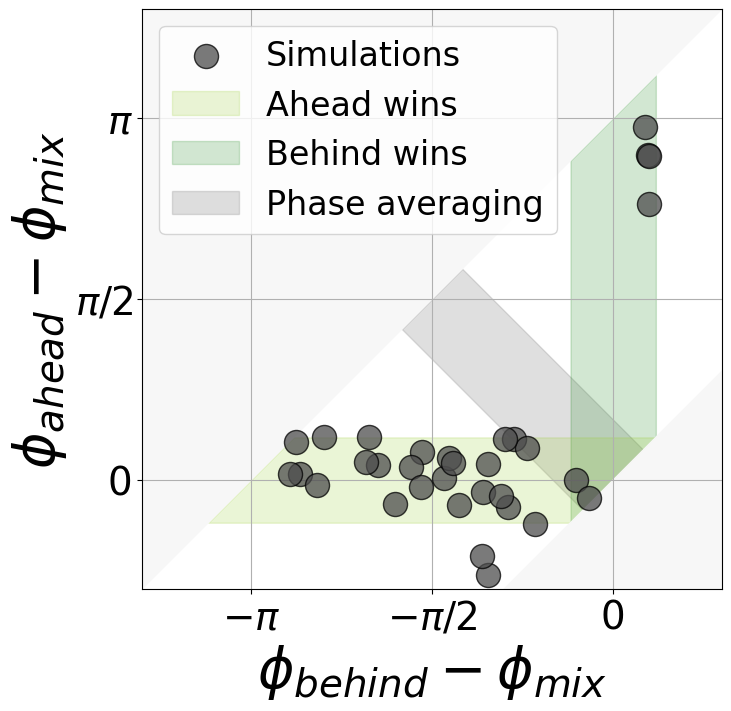

In [45]:
# Figure size
plt.rcParams["figure.figsize"] = 7.4, 7.4
fig, ax = plt.subplots()

# Time
t = 400.
t_i = np.where(times_sim == t)[0][0]

# Phase differences
sim = ax.scatter(RK_sim_phase_diff_label[:,2,t_i], RK_sim_phase_diff_label[:,1,t_i], facecolors='0.3', edgecolors='k', s=300, alpha=0.75, zorder=20, label='Simulations')

# Regions with different behaviors
alpha = 0.2
d1 = 0.37
d2 = d1/np.sqrt(2.)

# Phase averaging
avg = ax.fill_between([-0.5*np.pi-d2, -0.5*np.pi+d2, -d2, d2], [0.5*np.pi-d2, 0.5*np.pi-3.*d2, -d2, d2], [0.5*np.pi-d2, 0.5*np.pi+d2, 3.*d2, d2], color='grey', alpha=0.25, zorder=1, label='Phase averaging')

# Behind wins
behind = ax.fill_between([-d1, -d1, d1], [-d1, -d1, d1], [d1, np.pi-d1, np.pi+d1], color='forestgreen', alpha=alpha, zorder=1, label='Behind wins')

# Ahead wins
ahead = ax.fill_between([-np.pi-d1, -np.pi+d1, -d1, d1], [-d1, -d1, -d1, d1], [-d1, d1, d1, d1], color='yellowgreen', alpha=alpha, zorder=1, label='Ahead wins')

# Region with unphysical phase differences combinations
ax.fill_between([-1.5*np.pi, 0.5*np.pi], [-0.5*np.pi, 1.5*np.pi], [1.5*np.pi, 1.5*np.pi], color='0.97', zorder=1)
ax.fill_between([-np.pi, np.pi], [-np.pi, -np.pi], [-np.pi, np.pi], color='0.97', zorder=1)
ax.fill_between([-1.5*np.pi, -np.pi], [-np.pi, -np.pi], [-0.5*np.pi, -np.pi], color='0.97', zorder=1)
ax.fill_between([0.5*np.pi, np.pi], [1.5*np.pi, np.pi], [1.5*np.pi, 1.5*np.pi], color='0.97', zorder=1)

# Axes, ticks, grid, legend
ax.set_xlim([-1.3*np.pi, 0.3*np.pi])
ax.set_ylim([-0.3*np.pi, 1.3*np.pi])
ax.set_xticks([-np.pi, -0.5*np.pi, 0.])
ax.set_xticklabels(['$-\pi$', '$-\pi/2$', '0'])
ax.set_yticks([0., 0.5*np.pi, np.pi])
ax.set_yticklabels(['0', '$\pi/2$', '$\pi$'])
ax.tick_params(labelsize=28)
ax.set_aspect(aspect=1)
ax.grid(which='both')   
ax.set_ylabel("$\phi_{ahead}-\phi_{mix}$", fontsize=40)
ax.set_xlabel("$\phi_{behind}-\phi_{mix}$", fontsize=40)
ax.legend(handles=[sim, ahead, behind, avg], loc=2, fontsize=24)

# Save the figure
fig.tight_layout()
fig.savefig('Figures/FIG_5H.pdf', dpi=300)

<br>

Below, we reproduce Fig. 4F.

In [46]:
seed = 78365
np.random.seed(seed)
n_AB_exp = 32

# Parameters
param["c"] = 0.015
param["total_t"] = 805.
param["dt"] = 0.1
param["n_skr"] = 50

# Simulations
Hplus_sim_phase, Hplus_sim_phase_diff = [], []
for k in range(n_AB_exp):
    
    # Random initial phase for A
    if (np.random.binomial(1, 67./85.) == 1):
        init_phiA = np.random.uniform(np.pi/3., 4.*np.pi/3.)
        
    else:
        init_phiA = np.random.uniform(-2.*np.pi/3., np.pi/3.)
        
    # Random initial phase for B
    if (np.random.binomial(1, 67./85.) == 1):
        init_phiB = np.random.uniform(np.pi/3., 4.*np.pi/3.)
        
    else:
        init_phiB = np.random.uniform(-2.*np.pi/3., np.pi/3.)
    
    # Random frequencies
    T_A = np.random.normal(140., 9.8)
    T_B = T_A +np.random.normal(-1.6, 7.4)
    omegaA = 2.*np.pi/T_A
    omegaB = 2.*np.pi/T_B

    # A
    param["init_phi_A"] = init_phiA
    param["init_phi_B"] = init_phiA
    param["omega_A"] = omegaA
    param["omega_B"] = omegaA
    times_sim, results_A = fct.integrate(fct.H_plus, param)

    # B
    param["init_phi_A"] = init_phiB
    param["init_phi_B"] = init_phiB
    param["omega_A"] = omegaB
    param["omega_B"] = omegaB
    times_sim, results_B = fct.integrate(fct.H_plus, param)

    # AB (mix)
    param["init_phi_A"] = init_phiA
    param["init_phi_B"] = init_phiB
    param["omega_A"] = omegaA
    param["omega_B"] = omegaB
    times_sim, results_AB = fct.integrate(fct.H_plus, param)

    # Phases
    phi_A = fct.compute_phase_mix(results_A[0], results_A[1])
    phi_B = fct.compute_phase_mix(results_B[0], results_B[1])
    phi_AB = fct.compute_phase_mix(results_AB[0], results_AB[1])
        
    # Phase differences
    dphi_A_B = (phi_A-phi_B)
    dphi_A_AB = (phi_A-phi_AB)
    dphi_B_AB = (phi_B-phi_AB)
        
    # Store the results
    Hplus_sim_phase.append(np.array([phi_A, phi_B, phi_AB]))
    Hplus_sim_phase_diff.append(np.array([dphi_A_B, dphi_A_AB, dphi_B_AB]))
    
# Cast the phases between -π and π
Hplus_sim_phase = np.array(Hplus_sim_phase) %(2.*np.pi)
Hplus_sim_phase[Hplus_sim_phase > np.pi] -= 2.*np.pi

# Cast the phase differences between -π and π
Hplus_sim_phase_diff = np.array(Hplus_sim_phase_diff) %(2.*np.pi)
Hplus_sim_phase_diff[Hplus_sim_phase_diff > np.pi] -= 2.*np.pi

# Label which oscillator is ahead / behind
Hplus_sim_phase_diff_label = Hplus_sim_phase_diff.copy()
Hplus_sim_phase_diff_label[:,1][Hplus_sim_phase_diff[:,0]<0.] = Hplus_sim_phase_diff[:,2][Hplus_sim_phase_diff[:,0]<0.]
Hplus_sim_phase_diff_label[:,2][Hplus_sim_phase_diff[:,0]<0.] = Hplus_sim_phase_diff[:,1][Hplus_sim_phase_diff[:,0]<0.]

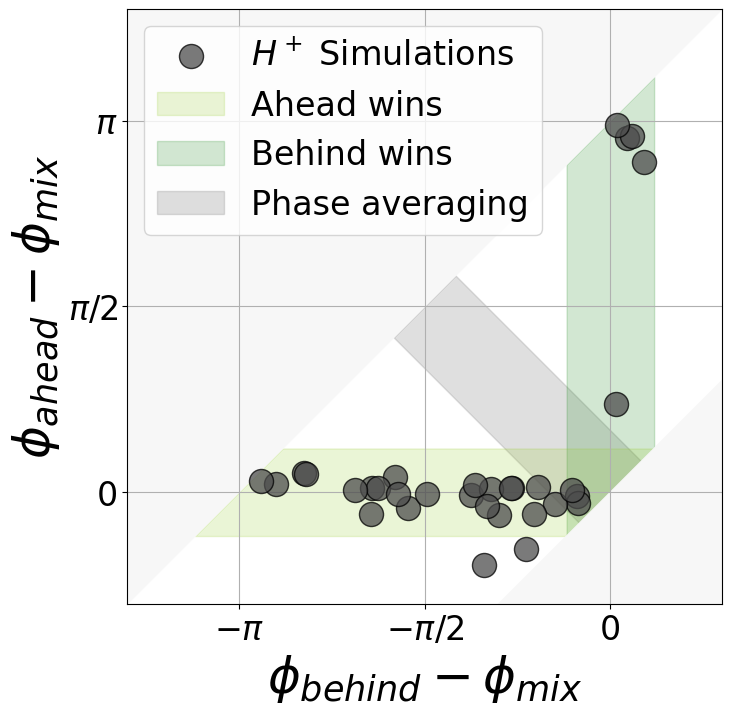

In [48]:
# Figure size
plt.rcParams["figure.figsize"] = 7.4, 7.4
fig, ax = plt.subplots()

# Time
t = 400.
t_i = np.where(times_sim == t)[0][0]

# Phase differences
sim = ax.scatter(Hplus_sim_phase_diff_label[:,2,t_i], Hplus_sim_phase_diff_label[:,1,t_i], facecolors='0.3', edgecolors='k', s=300, alpha=0.75, zorder=20, label=r'$H^+$ Simulations')

# Regions with different behaviors
alpha = 0.2
d1 = 0.37
d2 = d1/np.sqrt(2.)

# Phase averaging
avg = ax.fill_between([-0.5*np.pi-d2, -0.5*np.pi+d2, -d2, d2], [0.5*np.pi-d2, 0.5*np.pi-3.*d2, -d2, d2], [0.5*np.pi-d2, 0.5*np.pi+d2, 3.*d2, d2], color='grey', alpha=0.25, zorder=1, label='Phase averaging')

# Behind wins
behind = ax.fill_between([-d1, -d1, d1], [-d1, -d1, d1], [d1, np.pi-d1, np.pi+d1], color='forestgreen', alpha=alpha, zorder=1, label='Behind wins')

# Ahead wins
ahead = ax.fill_between([-np.pi-d1, -np.pi+d1, -d1, d1], [-d1, -d1, -d1, d1], [-d1, d1, d1, d1], color='yellowgreen', alpha=alpha, zorder=1, label='Ahead wins')

# Region with unphysical phase differences combinations
ax.fill_between([-1.5*np.pi, 0.5*np.pi], [-0.5*np.pi, 1.5*np.pi], [1.5*np.pi, 1.5*np.pi], color='0.97', zorder=1)
ax.fill_between([-np.pi, np.pi], [-np.pi, -np.pi], [-np.pi, np.pi], color='0.97', zorder=1)
ax.fill_between([-1.5*np.pi, -np.pi], [-np.pi, -np.pi], [-0.5*np.pi, -np.pi], color='0.97', zorder=1)
ax.fill_between([0.5*np.pi, np.pi], [1.5*np.pi, np.pi], [1.5*np.pi, 1.5*np.pi], color='0.97', zorder=1)

# Axes, ticks, grid, legend
ax.set_xlim([-1.3*np.pi, 0.3*np.pi])
ax.set_ylim([-0.3*np.pi, 1.3*np.pi])
ax.set_xticks([-np.pi, -0.5*np.pi, 0.])
ax.set_xticklabels(['$-\pi$', '$-\pi/2$', '0'])
ax.set_yticks([0., 0.5*np.pi, np.pi])
ax.set_yticklabels(['0', '$\pi/2$', '$\pi$'])
ax.tick_params(labelsize=24)
ax.set_aspect(aspect=1)
ax.grid(which='both')   
ax.set_ylabel("$\phi_{ahead}-\phi_{mix}$", fontsize=36)
ax.set_xlabel("$\phi_{behind}-\phi_{mix}$", fontsize=36)
ax.legend(handles=[sim, ahead, behind, avg], loc=2, fontsize=24)

# Save the figure
fig.tight_layout()
fig.savefig('Figures/FIG_4F.pdf', dpi=300)

<br>

Below, we reproduce Fig. 4G.

In [49]:
seed = 91382
np.random.seed(seed)
n_AB_exp = 32

# Parameters
param["c"] = 0.015
param["total_t"] = 805.
param["dt"] = 0.1
param["n_skr"] = 50

# Simulations
Hminus_sim_phase, Hminus_sim_phase_diff = [], []
for k in range(n_AB_exp):
    
    # Random initial phase for A
    if (np.random.binomial(1, 67./85.) == 1):
        init_phiA = np.random.uniform(np.pi/3., 4.*np.pi/3.)
        
    else:
        init_phiA = np.random.uniform(-2.*np.pi/3., np.pi/3.)
        
    # Random initial phase for B
    if (np.random.binomial(1, 67./85.) == 1):
        init_phiB = np.random.uniform(np.pi/3., 4.*np.pi/3.)
        
    else:
        init_phiB = np.random.uniform(-2.*np.pi/3., np.pi/3.)
    
    # Random frequencies
    T_A = np.random.normal(140., 9.8)
    T_B = T_A +np.random.normal(-1.6, 7.4)
    omegaA = 2.*np.pi/T_A
    omegaB = 2.*np.pi/T_B

    # A
    param["init_phi_A"] = init_phiA
    param["init_phi_B"] = init_phiA
    param["omega_A"] = omegaA
    param["omega_B"] = omegaA
    times_sim, results_A = fct.integrate(fct.H_minus, param)

    # B
    param["init_phi_A"] = init_phiB
    param["init_phi_B"] = init_phiB
    param["omega_A"] = omegaB
    param["omega_B"] = omegaB
    times_sim, results_B = fct.integrate(fct.H_minus, param)

    # AB (mix)
    param["init_phi_A"] = init_phiA
    param["init_phi_B"] = init_phiB
    param["omega_A"] = omegaA
    param["omega_B"] = omegaB
    times_sim, results_AB = fct.integrate(fct.H_minus, param)

    # Phases
    phi_A = fct.compute_phase_mix(results_A[0], results_A[1])
    phi_B = fct.compute_phase_mix(results_B[0], results_B[1])
    phi_AB = fct.compute_phase_mix(results_AB[0], results_AB[1])
        
    # Phase differences
    dphi_A_B = (phi_A-phi_B)
    dphi_A_AB = (phi_A-phi_AB)
    dphi_B_AB = (phi_B-phi_AB)
        
    # Store the results
    Hminus_sim_phase.append(np.array([phi_A, phi_B, phi_AB]))
    Hminus_sim_phase_diff.append(np.array([dphi_A_B, dphi_A_AB, dphi_B_AB]))
    
# Cast the phases between -π and π
Hminus_sim_phase = np.array(Hminus_sim_phase) %(2.*np.pi)
Hminus_sim_phase[Hminus_sim_phase > np.pi] -= 2.*np.pi

# Cast the phase differences between -π and π
Hminus_sim_phase_diff = np.array(Hminus_sim_phase_diff) %(2.*np.pi)
Hminus_sim_phase_diff[Hminus_sim_phase_diff > np.pi] -= 2.*np.pi

# Label which oscillator is ahead / behind
Hminus_sim_phase_diff_label = Hminus_sim_phase_diff.copy()
Hminus_sim_phase_diff_label[:,1][Hminus_sim_phase_diff[:,0]<0.] = Hminus_sim_phase_diff[:,2][Hminus_sim_phase_diff[:,0]<0.]
Hminus_sim_phase_diff_label[:,2][Hminus_sim_phase_diff[:,0]<0.] = Hminus_sim_phase_diff[:,1][Hminus_sim_phase_diff[:,0]<0.]

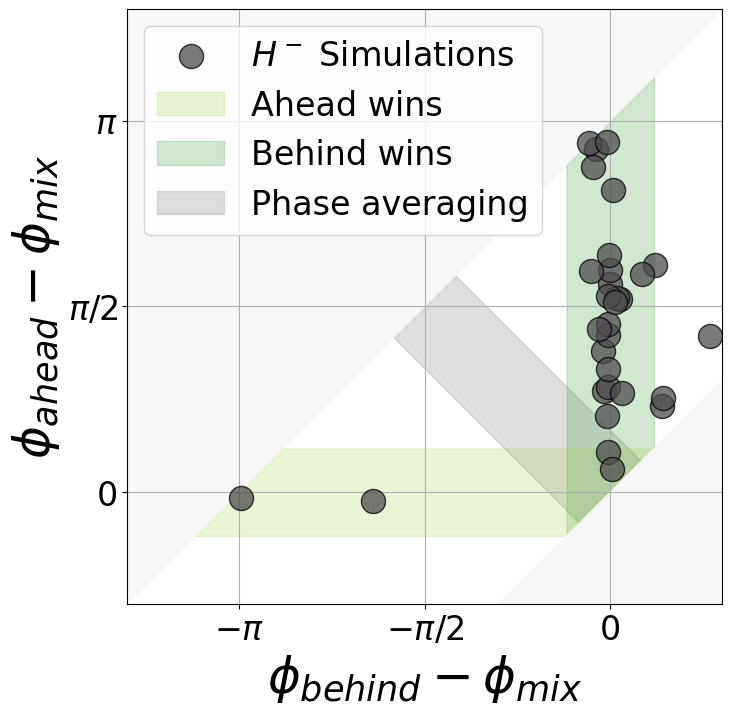

In [50]:
# Figure size
plt.rcParams["figure.figsize"] = 7.4, 7.4
fig, ax = plt.subplots()

# Time
t = 400.
t_i = np.where(times_sim == t)[0][0]

# Phase differences
sim = ax.scatter(Hminus_sim_phase_diff_label[:,2,t_i], Hminus_sim_phase_diff_label[:,1,t_i], facecolors='0.3', edgecolors='k', s=300, alpha=0.75, zorder=20, label=r'$H^-$ Simulations')

# Regions with different behaviors
alpha = 0.2
d1 = 0.37
d2 = d1/np.sqrt(2.)

# Phase averaging
avg = ax.fill_between([-0.5*np.pi-d2, -0.5*np.pi+d2, -d2, d2], [0.5*np.pi-d2, 0.5*np.pi-3.*d2, -d2, d2], [0.5*np.pi-d2, 0.5*np.pi+d2, 3.*d2, d2], color='grey', alpha=0.25, zorder=1, label='Phase averaging')

# Behind wins
behind = ax.fill_between([-d1, -d1, d1], [-d1, -d1, d1], [d1, np.pi-d1, np.pi+d1], color='forestgreen', alpha=alpha, zorder=1, label='Behind wins')

# Ahead wins
ahead = ax.fill_between([-np.pi-d1, -np.pi+d1, -d1, d1], [-d1, -d1, -d1, d1], [-d1, d1, d1, d1], color='yellowgreen', alpha=alpha, zorder=1, label='Ahead wins')

# Region with unphysical phase differences combinations
ax.fill_between([-1.5*np.pi, 0.5*np.pi], [-0.5*np.pi, 1.5*np.pi], [1.5*np.pi, 1.5*np.pi], color='0.97', zorder=1)
ax.fill_between([-np.pi, np.pi], [-np.pi, -np.pi], [-np.pi, np.pi], color='0.97', zorder=1)
ax.fill_between([-1.5*np.pi, -np.pi], [-np.pi, -np.pi], [-0.5*np.pi, -np.pi], color='0.97', zorder=1)
ax.fill_between([0.5*np.pi, np.pi], [1.5*np.pi, np.pi], [1.5*np.pi, 1.5*np.pi], color='0.97', zorder=1)

# Axes, ticks, grid, legend
ax.set_xlim([-1.3*np.pi, 0.3*np.pi])
ax.set_ylim([-0.3*np.pi, 1.3*np.pi])
ax.set_xticks([-np.pi, -0.5*np.pi, 0.])
ax.set_xticklabels(['$-\pi$', '$-\pi/2$', '0'])
ax.set_yticks([0., 0.5*np.pi, np.pi])
ax.set_yticklabels(['0', '$\pi/2$', '$\pi$'])
ax.tick_params(labelsize=24)
ax.set_aspect(aspect=1)
ax.grid(which='both')   
ax.set_ylabel("$\phi_{ahead}-\phi_{mix}$", fontsize=36)
ax.set_xlabel("$\phi_{behind}-\phi_{mix}$", fontsize=36)
ax.legend(handles=[sim, ahead, behind, avg], loc=2, fontsize=24)

# Save the figure
fig.tight_layout()
fig.savefig('Figures/FIG_4G.pdf', dpi=300)